##### list of experiment:
- EXP1: std algorithm, node doubled, partition generated
- EXP2: std algorithm, node doubled, partition fixed to 10 community
- EXP3: std algorithm, partition doubled, graph fixed to 2expnode(n=20480, m=50000).graph
- EXP4: std algorithm, edge doubled, partition generated
- EXP5 undirected algorithm, node doubled, partition fixed to 10 community
- EXP6 undirected algorithm, partition doubled, graph fixed to 2expnode(n=20480, m=50000).graph
- EXP7 undirected algorithm, edge doubled, partition generated

In [11]:
import networkit as nk
import numpy as np
import pandas as pd
import re
from networkit.graphio import BinaryPartitionReader
import matplotlib.pyplot as plt

In [12]:
all_data = pd.read_csv("../results/time.csv", sep=";")
all_data

,Code,Graph,Partition,Flag,Community computation,Nodes computation,GLR computation,Total
0,python,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.249632,0.810747,19.468141,19.469360
1,python,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.457549,2.529974,66.076160,66.081450
2,python,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.020755,0.051101,1.059860,1.060017
3,python,"2expnode(n=40960, m=50000).graph",NaN,2expnode,0.757963,20.458904,593.701867,593.732502
4,python,"2expnode(n=2560, m=50000).graph",NaN,2expnode,0.021359,0.394145,7.887121,7.887537
...,...,...,...,...,...,...,...,...
635,C++,"2expedge(n=640, m=40896).graph",NaN,2expedge,0.013381,0.024559,0.776110,0.776124
636,C++,"2expedge(n=640, m=81792).graph",NaN,2expedge,0.025889,0.055713,1.930100,1.930111
637,C++,"2expedge(n=640, m=81792).graph",NaN,2expedge,0.010690,0.034552,1.892304,1.892317
638,C++,"2expedge(n=640, m=10224).graph",NaN,2expedge,0.005410,0.010090,0.354089,0.354102


In [13]:
pattern = r"n=(\d+),\s*m=(\d+)"
all_data["n"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(1)))
all_data["m"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(2)))

In [14]:
all_data["deltaNodesComputation"] = all_data["Nodes computation"] - all_data["Community computation"]
all_data["deltaGLR"] = all_data["GLR computation"] - all_data["Nodes computation"]

In [15]:
grouped = all_data.groupby(['Code', 'Graph', 'Flag', 'Partition', 'n', 'm'], as_index=False, dropna=False)
all_data = grouped.mean()
all_data

,Code,Graph,Flag,Partition,n,m,Community computation,Nodes computation,GLR computation,Total,deltaNodesComputation,deltaGLR
0,C++,"2expedge(n=640, m=10224).graph",2expedge,NaN,640,10224,0.149101,0.161386,0.614922,0.614976,0.012285,0.453536
1,C++,"2expedge(n=640, m=10224).graph",2expedgeundirected,NaN,640,10224,0.018455,0.023471,0.023776,0.023793,0.005016,0.000305
2,C++,"2expedge(n=640, m=1278).graph",2expedge,NaN,640,1278,0.008339,0.015408,0.156256,0.156320,0.007069,0.140848
3,C++,"2expedge(n=640, m=1278).graph",2expedgeundirected,NaN,640,1278,0.016543,0.020193,0.020487,0.020512,0.003650,0.000294
4,C++,"2expedge(n=640, m=163584).graph",2expedge,NaN,640,163584,0.023799,0.049615,3.707820,3.707897,0.025816,3.658205
...,...,...,...,...,...,...,...,...,...,...,...,...
101,python,"2expnode(n=5120, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,5120,50000,0.062316,1.131882,37.623645,37.626066,1.069567,36.491762
102,python,"2expnode(n=5120, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,5120,50000,0.022857,0.692653,0.748375,0.750087,0.669797,0.055722
103,python,"2expnode(n=640, m=50000).graph",2expnode,NaN,640,50000,0.022486,0.047988,1.167149,1.167380,0.025503,1.119161
104,python,"2expnode(n=640, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,640,50000,0.012526,0.070919,1.037123,1.037279,0.058393,0.966205


# Statistics

In [16]:
statistics = grouped.describe()

# Select programming language to show results for

In [17]:
programming_language = "C++" # python/C++

# Utility function

In [18]:
def plot_column(df, column_names, num_row=1, num_colum=1, one_ax=False, figsize=(20,8)):
    if one_ax:
        _, axes = plt.subplots(1, 1, figsize=figsize)
    else:
        _, axes = plt.subplots(num_row, num_colum, figsize=figsize)
    for i in range(len(column_names)):
        ax=axes 
        column_name = column_names[i]
        if (num_row, num_colum) != (1,1) and not one_ax:
           ax = axes[i] 
        if not one_ax:
            ax.set_ylabel(column_name)
        df[column_name].plot(marker="o", ax=ax, label=column_name)
    if one_ax:
         axes.legend()
    plt.show()

# Statistics EXP1

In [19]:
statistics[ statistics["Flag"] == "2expnode"]

Code                             Graph      Flag Partition      n  \
                                                                           
18      C++  2expnode(n=10240, m=50000).graph  2expnode       NaN  10240   
21      C++   2expnode(n=1280, m=50000).graph  2expnode       NaN   1280   
38      C++  2expnode(n=20480, m=50000).graph  2expnode       NaN  20480   
41      C++   2expnode(n=2560, m=50000).graph  2expnode       NaN   2560   
44      C++  2expnode(n=40960, m=50000).graph  2expnode       NaN  40960   
47      C++   2expnode(n=5120, m=50000).graph  2expnode       NaN   5120   
50      C++    2expnode(n=640, m=50000).graph  2expnode       NaN    640   
71   python  2expnode(n=10240, m=50000).graph  2expnode       NaN  10240   
74   python   2expnode(n=1280, m=50000).graph  2expnode       NaN   1280   
91   python  2expnode(n=20480, m=50000).graph  2expnode       NaN  20480   
94   python   2expnode(n=2560, m=50000).graph  2expnode       NaN   2560   
97   python  2expnode(n=40960, m=50000).graph  2expnode       NaN  40960   
100  python   2expnode(n=5120, m=50000).graph  2expnode       NaN   5120   
103  python    2expnode(n=640, m=50000).graph  2expnode       NaN    640   

         m Community computation                                ...  \
                           count      mean       std       min  ...   
18   50000                   3.0  0.136679  0.034803  0.102455  ...   
21   50000                   3.0  0.021063  0.012904  0.012859  ...   
38   50000                   3.0  0.200575  0.056680  0.161652  ...   
41   50000                   3.0  0.032369  0.021831  0.018662  ...   
44   50000                   3.0  0.369819  0.020014  0.347801  ...   
47   50000                   3.0  0.072951  0.020900  0.049892  ...   
50   50000                   3.0  0.009149  0.002041  0.007152  ...   
71   50000                   3.0  0.469772  0.109771  0.366625  ...   
74   50000                   3.0  0.078723  0.030710  0.054334  ...   
91   50000                   3.0  0.647963  0.085403  0.588773  ...   
94   50000                   3.0  0.082281  0.071782  0.021359  ...   
97   50000                   3.0  0.667566  0.146712  0.498289  ...   
100  50000                   3.0  0.574619  0.582582  0.227024  ...   
103  50000                   3.0  0.022486  0.001679  0.020755  ...   

    deltaNodesComputation            deltaGLR                         \
                      75%        max    count        mean        std   
18               0.423063   0.462344      3.0   73.904358  16.165316   
21               0.054016   0.058270      3.0    1.316830   0.142058   
38               1.140321   1.160346      3.0  280.191227  67.857364   
41               0.078252   0.084543      3.0    8.602079   0.663145   
44               3.729646   3.956231      3.0  590.843554  48.054816   
47               0.250487   0.275916      3.0   22.303442   5.520833   
50               0.022982   0.035598      3.0    1.037249   0.175214   
71               3.020421   3.968417      3.0   58.452894   4.981184   
74               0.170374   0.170441      3.0    1.436054   0.055006   
91               6.770822   7.077939      3.0  162.574754   8.930918   
94               0.463396   0.554005      3.0    8.012729   0.515398   
97              21.576929  23.452917      3.0  537.244402  31.827360   
100              0.819131   0.844744      3.0   18.746002   0.325563   
103              0.029884   0.030346      3.0    1.119161   0.096521   

                                                                 
            min         25%         50%         75%         max  
18    60.451860   64.937883   69.423905   80.630606   91.837308  
21     1.189355    1.240259    1.291162    1.380567    1.469972  
38   212.498248  246.180945  279.863642  314.037716  348.211790  
41     8.065813    8.231330    8.396846    8.870212    9.343578  
44   550.253926  564.313024  578.372121  611.138368  643.904615  
47    17.732446   19.236563   20.74068

# Programming Language Comparison (EXP1)

##### Filter results

In [20]:
all_comparison = all_data[ all_data["Flag"] == "2expnode"]

In [21]:
py_comparison = all_comparison[ all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[ all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"], suffixes=("_py", "_cpp"))
comparison

,Graph,Flag,Partition,n,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=10240, m=50000).graph",2expnode,NaN,10240,0.469772,2.934030,61.386924,61.390214,2.464258,58.452894,0.136679,0.546127,74.450484,74.451392,0.409448,73.904358
1,"2expnode(n=1280, m=50000).graph",2expnode,NaN,1280,0.078723,0.233198,1.669252,1.669524,0.154475,1.436054,0.021063,0.062803,1.379633,1.379706,0.041740,1.316830
2,"2expnode(n=20480, m=50000).graph",2expnode,NaN,20480,0.647963,6.676985,169.251739,169.258372,6.029022,162.574754,0.200575,1.315280,281.506506,281.508535,1.114705,280.191227
3,"2expnode(n=2560, m=50000).graph",2expnode,NaN,2560,0.082281,0.433182,8.445912,8.446346,0.350901,8.012729,0.032369,0.106743,8.708822,8.709029,0.074373,8.602079
4,"2expnode(n=40960, m=50000).graph",2expnode,NaN,40960,0.667566,20.614547,557.858948,557.888292,19.946980,537.244402,0.369819,3.935434,594.778988,594.784175,3.565615,590.843554
5,"2expnode(n=5120, m=50000).graph",2expnode,NaN,5120,0.574619,1.307744,20.053746,20.054920,0.733126,18.746002,0.072951,0.306163,22.609605,22.610006,0.233212,22.303442
6,"2expnode(n=640, m=50000).graph",2expnode,NaN,640,0.022486,0.047988,1.167149,1.167380,0.025503,1.119161,0.009149,0.027513,1.064762,1.064801,0.018364,1.037249


##### Set number of nodes as ID

In [22]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [23]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,1.167380,1.064801
1280,1.669524,1.379706
2560,8.446346,8.709029
5120,20.054920,22.610006
10240,61.390214,74.451392
20480,169.258372,281.508535
40960,557.888292,594.784175


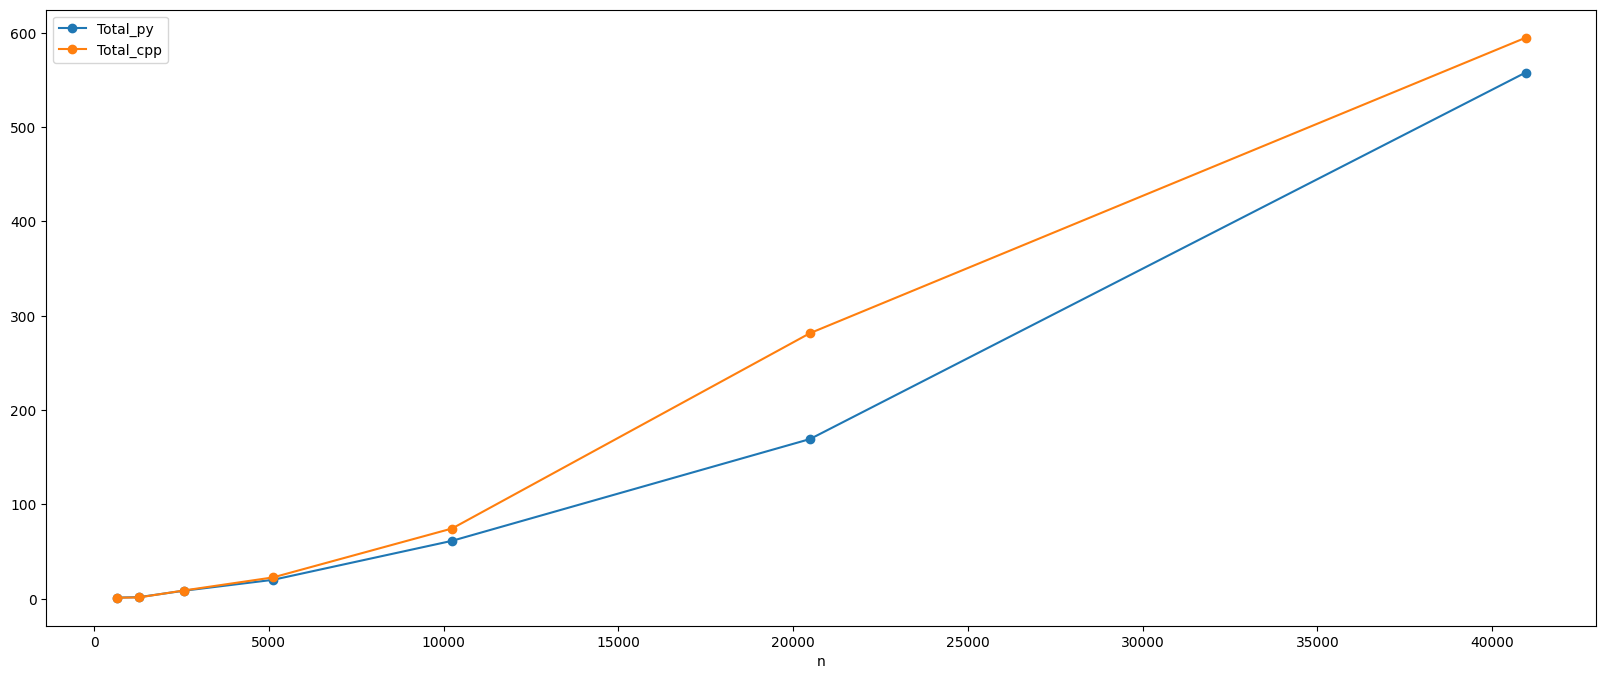

In [24]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare partitionsComputation

In [25]:
comparison.filter(regex="Community computation")

,Community computation_py,Community computation_cpp
n,,
640,0.022486,0.009149
1280,0.078723,0.021063
2560,0.082281,0.032369
5120,0.574619,0.072951
10240,0.469772,0.136679
20480,0.647963,0.200575
40960,0.667566,0.369819


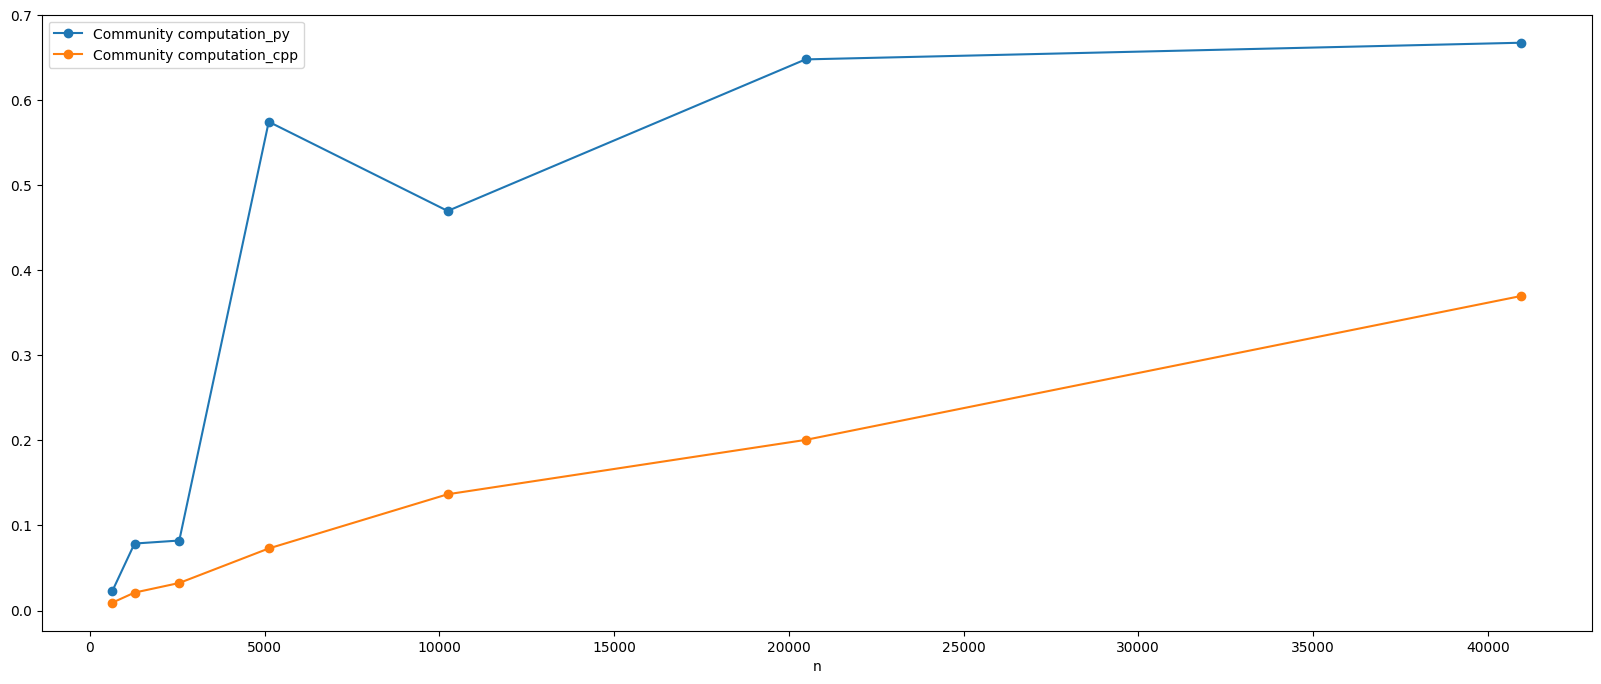

In [26]:
plot_column(comparison, ['Community computation_py', 'Community computation_cpp'], one_ax=True)

##### Compare nodesComputation

In [27]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.025503,0.018364
1280,0.154475,0.041740
2560,0.350901,0.074373
5120,0.733126,0.233212
10240,2.464258,0.409448
20480,6.029022,1.114705
40960,19.946980,3.565615


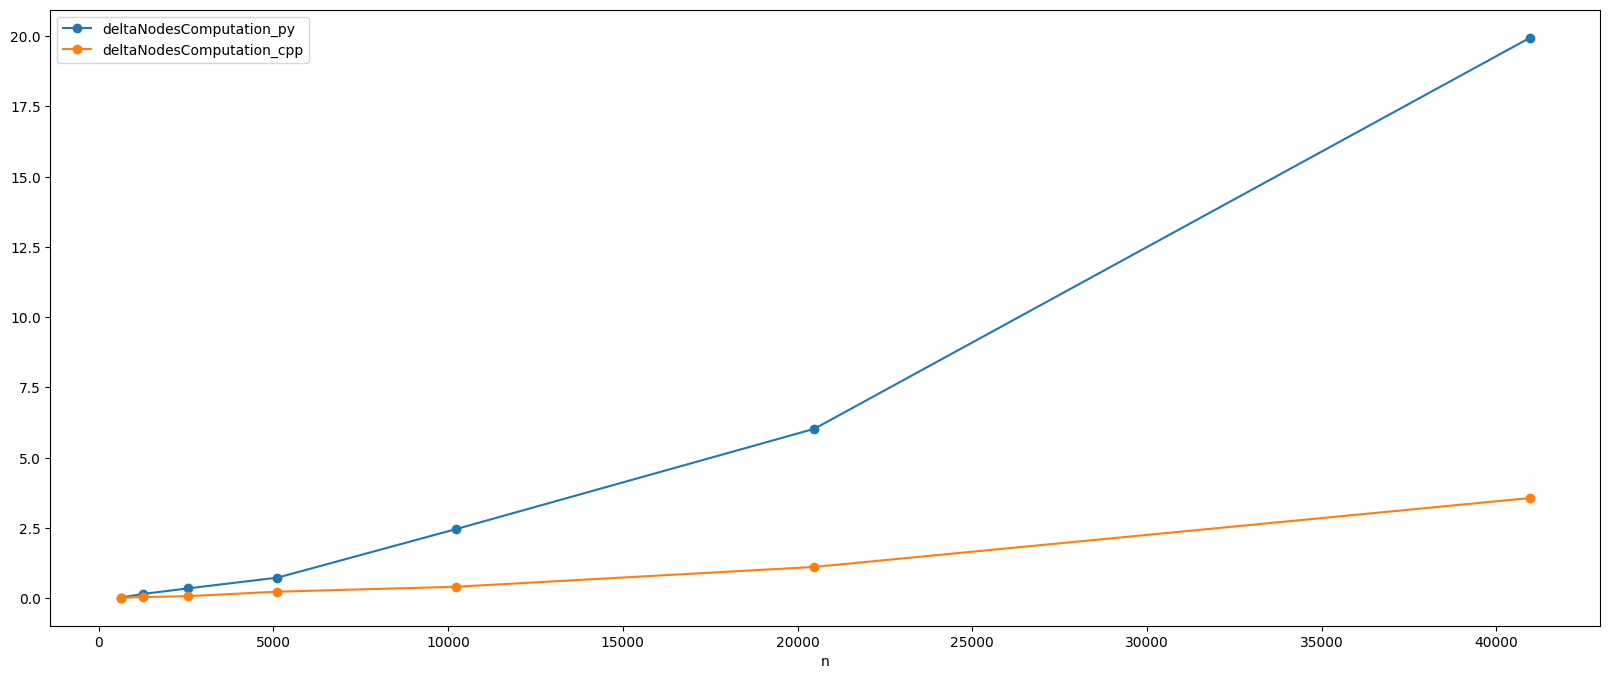

In [28]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [29]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,1.119161,1.037249
1280,1.436054,1.316830
2560,8.012729,8.602079
5120,18.746002,22.303442
10240,58.452894,73.904358
20480,162.574754,280.191227
40960,537.244402,590.843554


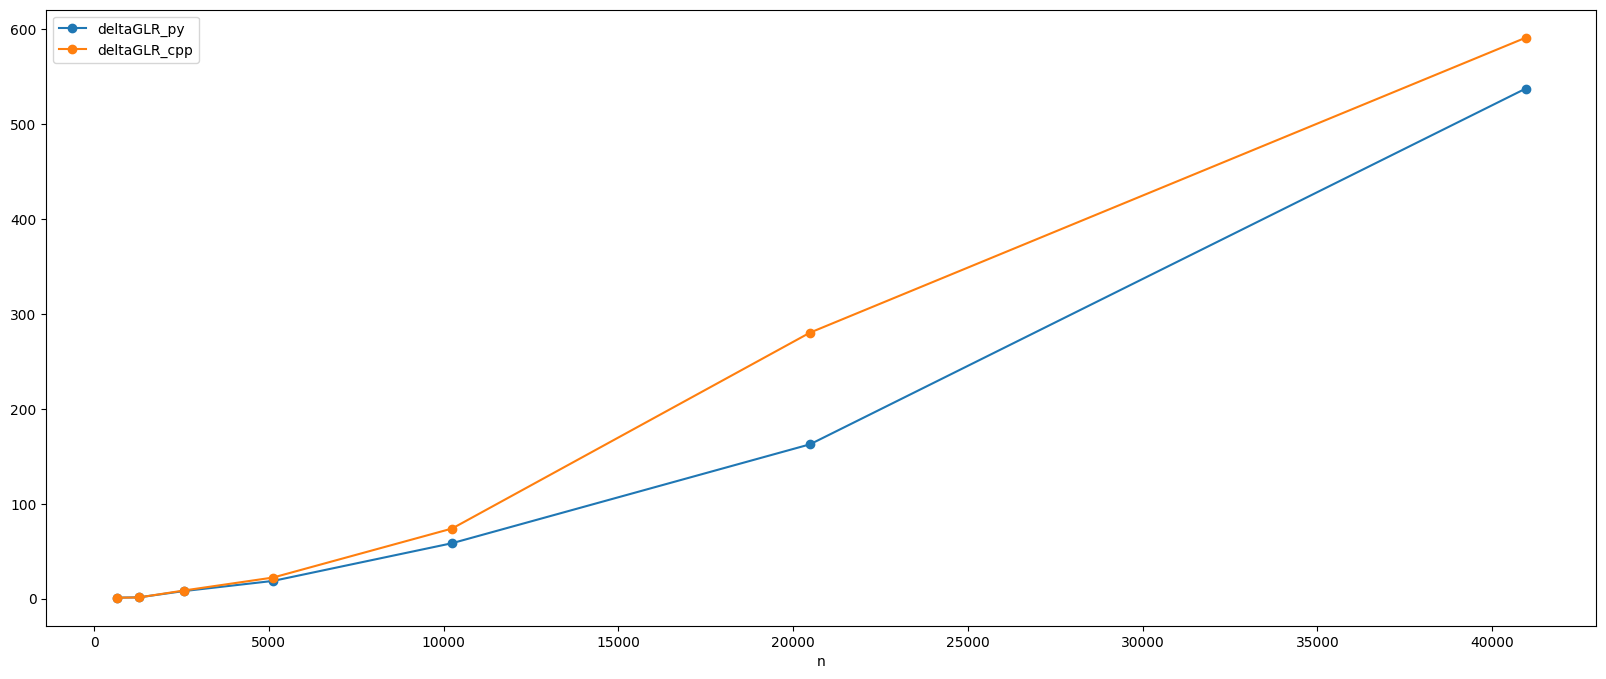

In [30]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (EXP1)

##### Filter results

In [31]:
dexpnode = all_data[ all_data["Flag"] == "2expnode"]
dexpnode = dexpnode[dexpnode["Code"] == programming_language]

##### Set number of nodes as ID

In [32]:
dexpnode.set_index("n", inplace=True)
dexpnode.sort_index(inplace=True)

##### Show total time

In [33]:
dexpnode[["Total"]]

,Total
n,
640,1.064801
1280,1.379706
2560,8.709029
5120,22.610006
10240,74.451392
20480,281.508535
40960,594.784175


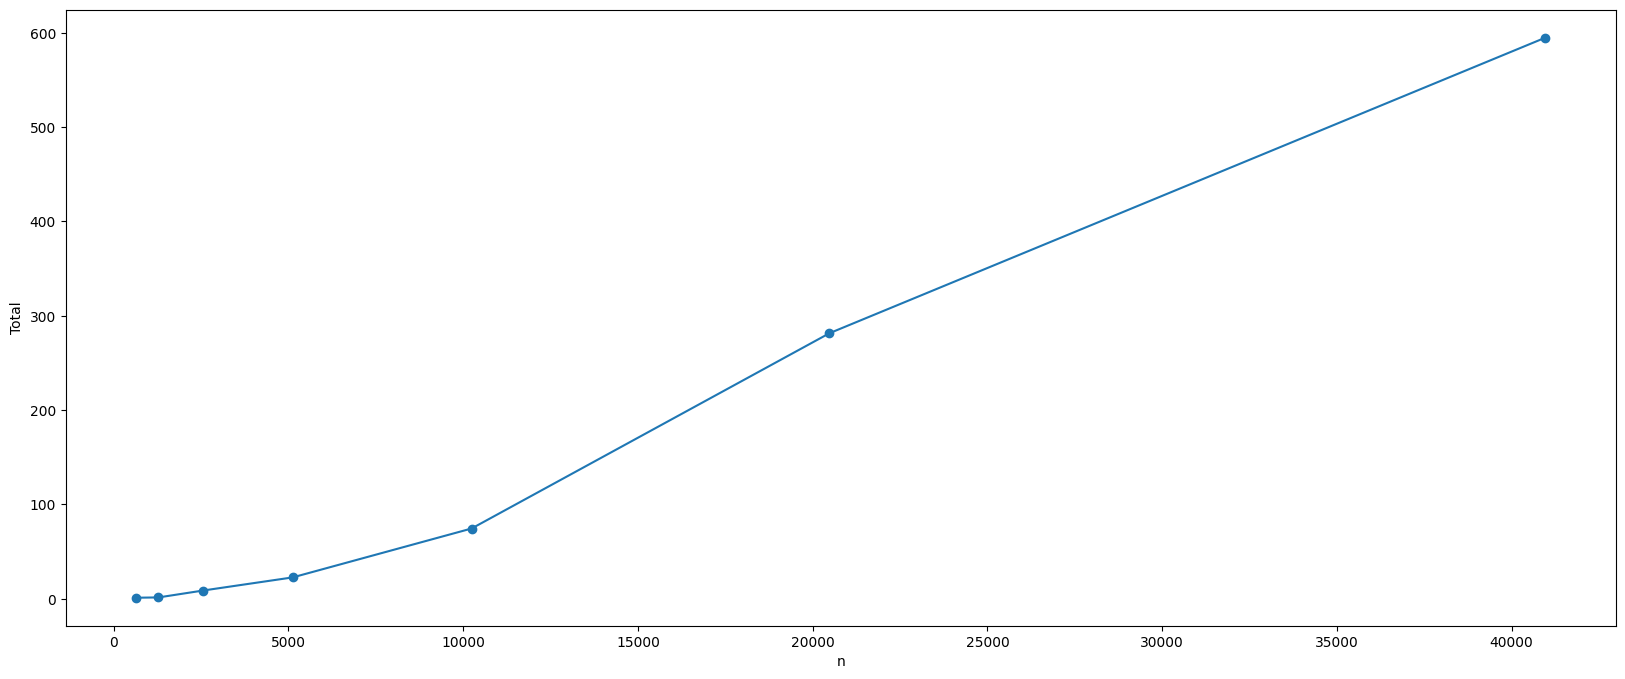

In [34]:
plot_column(dexpnode, ["Total"])

##### Show partitionsComputation

In [35]:
dexpnode[["Community computation"]]

,Community computation
n,
640,0.009149
1280,0.021063
2560,0.032369
5120,0.072951
10240,0.136679
20480,0.200575
40960,0.369819


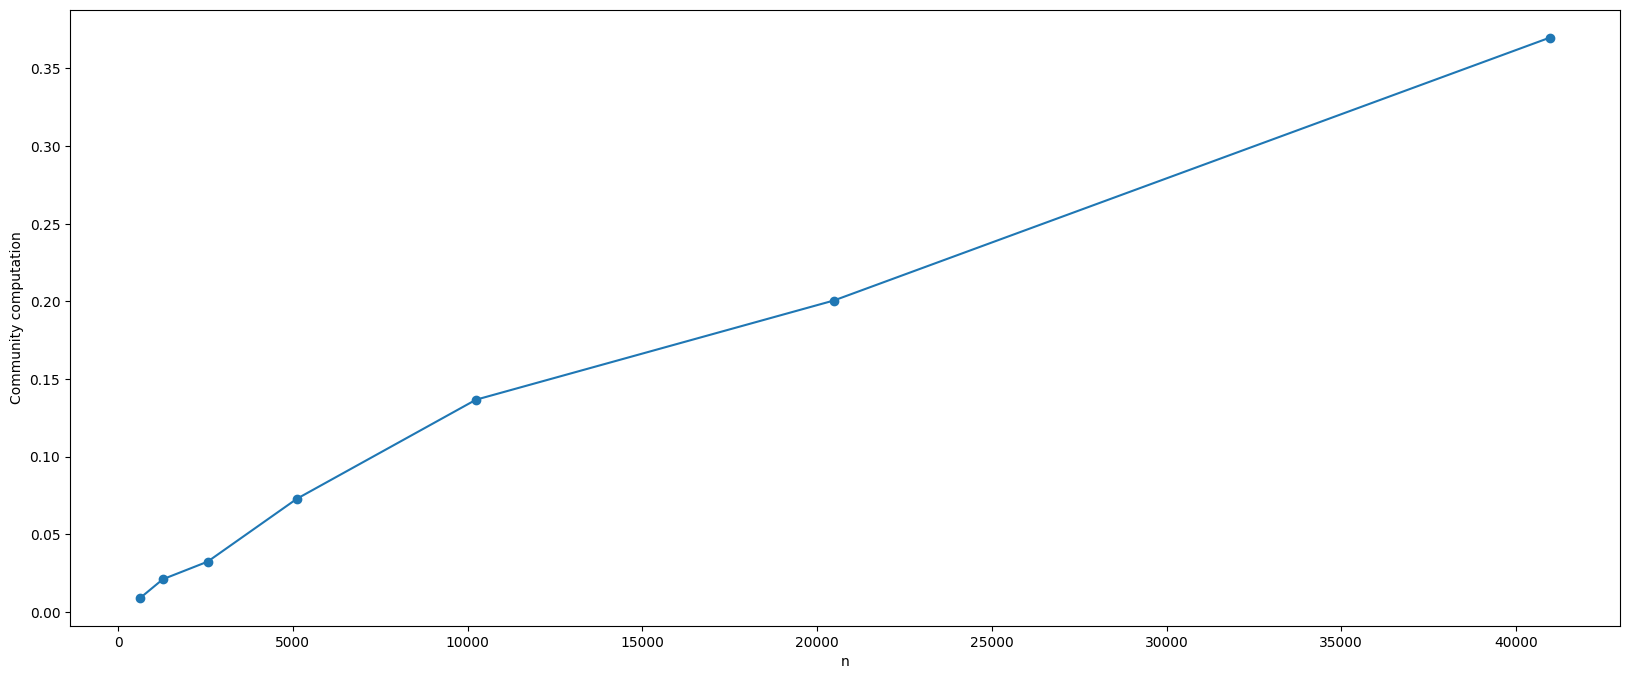

In [36]:
plot_column(dexpnode, ["Community computation"])

##### Show nodesComputation

In [37]:
dexpnode[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.018364
1280,0.041740
2560,0.074373
5120,0.233212
10240,0.409448
20480,1.114705
40960,3.565615


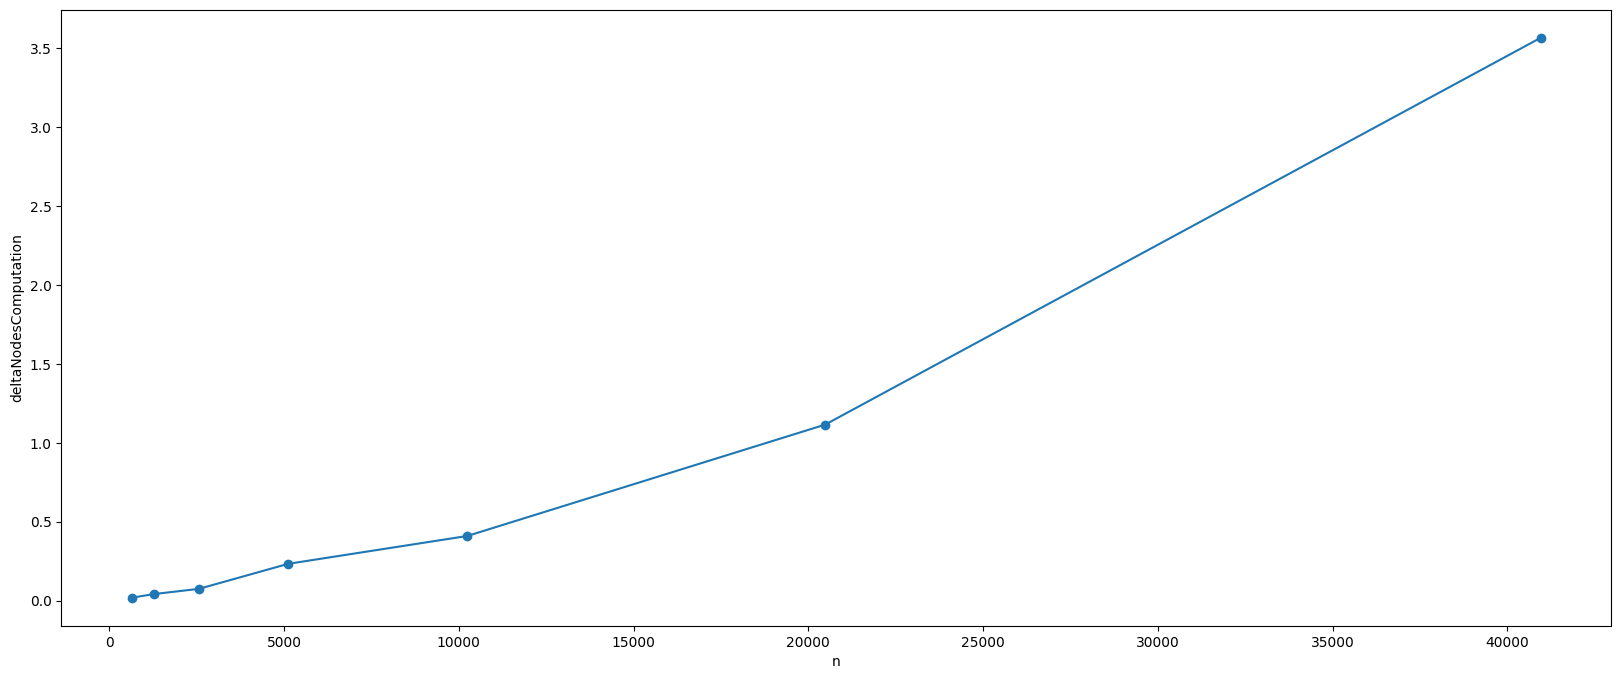

In [38]:
plot_column(dexpnode, ["deltaNodesComputation"])

##### Show deltaGLR

In [39]:
dexpnode[["deltaGLR"]]

,deltaGLR
n,
640,1.037249
1280,1.316830
2560,8.602079
5120,22.303442
10240,73.904358
20480,280.191227
40960,590.843554


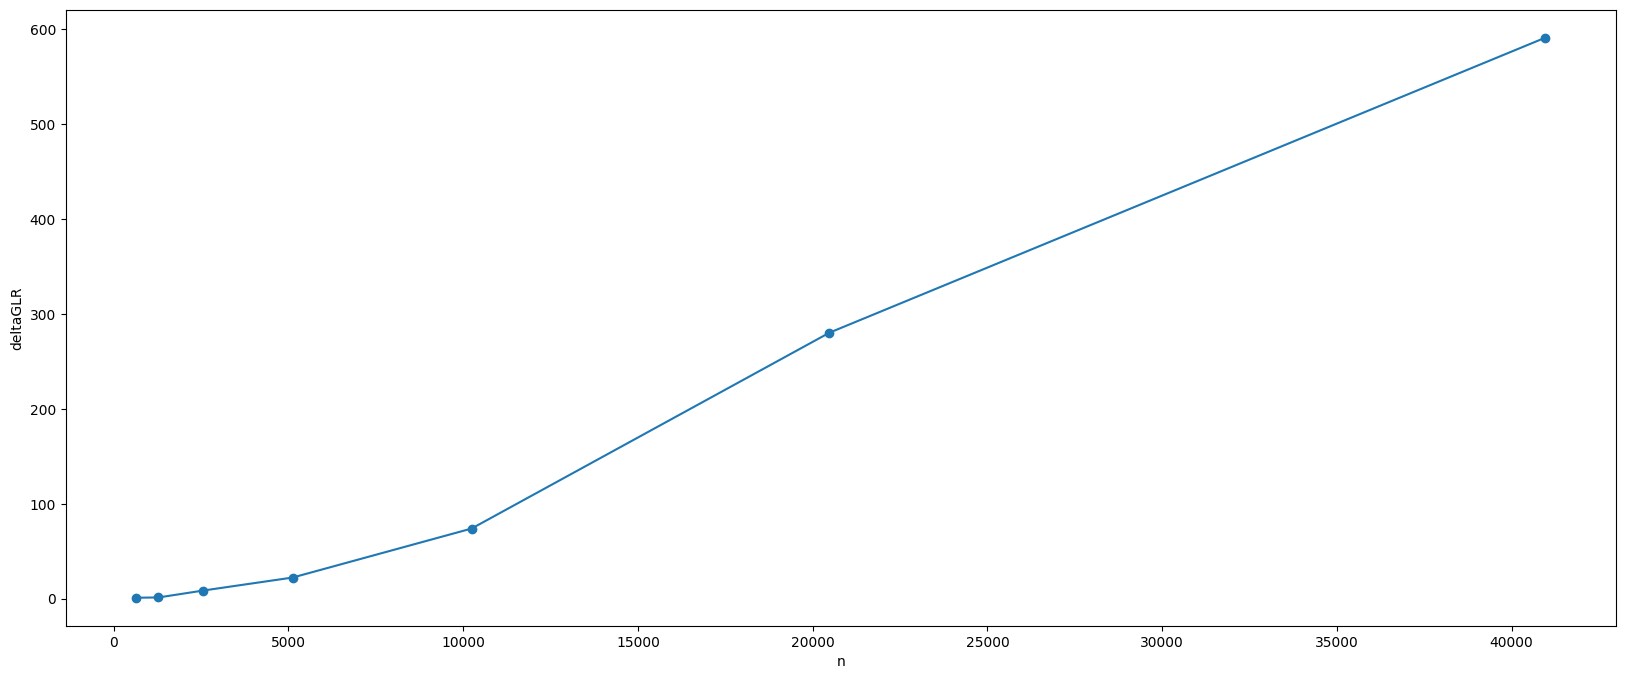

In [40]:
plot_column(dexpnode, ["deltaGLR"])

# Statistics EXP2

In [41]:
statistics[ statistics["Flag"] == "2expnode(fixnumbercommunity)"]

Code                             Graph                          Flag  \
                                                                              
19      C++  2expnode(n=10240, m=50000).graph  2expnode(fixnumbercommunity)   
22      C++   2expnode(n=1280, m=50000).graph  2expnode(fixnumbercommunity)   
39      C++  2expnode(n=20480, m=50000).graph  2expnode(fixnumbercommunity)   
42      C++   2expnode(n=2560, m=50000).graph  2expnode(fixnumbercommunity)   
45      C++  2expnode(n=40960, m=50000).graph  2expnode(fixnumbercommunity)   
48      C++   2expnode(n=5120, m=50000).graph  2expnode(fixnumbercommunity)   
51      C++    2expnode(n=640, m=50000).graph  2expnode(fixnumbercommunity)   
72   python  2expnode(n=10240, m=50000).graph  2expnode(fixnumbercommunity)   
75   python   2expnode(n=1280, m=50000).graph  2expnode(fixnumbercommunity)   
92   python  2expnode(n=20480, m=50000).graph  2expnode(fixnumbercommunity)   
95   python   2expnode(n=2560, m=50000).graph  2expnode(fixnumbercommunity)   
98   python  2expnode(n=40960, m=50000).graph  2expnode(fixnumbercommunity)   
101  python   2expnode(n=5120, m=50000).graph  2expnode(fixnumbercommunity)   
104  python    2expnode(n=640, m=50000).graph  2expnode(fixnumbercommunity)   

                                             Partition      n      m  \
                                                                       
19   ../partial_results/partitions/partition10//2ex...  10240  50000   
22   ../partial_results/partitions/partition10//2ex...   1280  50000   
39   ../partial_results/partitions/partition10//2ex...  20480  50000   
42   ../partial_results/partitions/partition10//2ex...   2560  50000   
45   ../partial_results/partitions/partition10//2ex...  40960  50000   
48   ../partial_results/partitions/partition10//2ex...   5120  50000   
51   ../partial_results/partitions/partition10//2ex...    640  50000   
72   ../partial_results/partitions/partition10//2ex...  10240  50000   
75   ../partial_results/partitions/partition10//2ex...   1280  50000   
92   ../partial_results/partitions/partition10//2ex...  20480  50000   
95   ../partial_results/partitions/partition10//2ex...   2560  50000   
98   ../partial_results/partitions/partition10//2ex...  40960  50000   
101  ../partial_results/partitions/partition10//2ex...   5120  50000   
104  ../partial_results/partitions/partition10//2ex...    640  50000   

    Community computation                                ...  \
                    count      mean       std       min  ...   
19                    3.0  0.016875  0.005134  0.012957  ...   
22                    3.0  0.011763  0.009124  0.006231  ...   
39                    3.0  0.052349  0.037646  0.026622  ...   
42                    3.0  0.014413  0.005163  0.009935  ...   
45                    3.0  0.055384  0.018069  0.034551  ...   
48                    3.0  0.009206  0.001340  0.008079  ...   
51                    3.0  0.013103  0.013051  0.004539  ...   
72                    3.0  0.047417  0.032159  0.012858  ...   
75                    3.0  0.015459  0.008057  0.006699  ...   
92                    3.0  0.058431  0.022309  0.033712  ...   
95                    3.0  0.009256  0.003722  0.006977  ...   
98                    3.0  0.070261  0.006346  0.063444  ...   
101                   3.0  0.062316  0.023726  0.041943  ...   
104                   3.0  0.012526  0.001541  0.010817  ...   

    deltaNodesComputation           deltaGLR                          \
                      75%       max    count        mean         std   
19               0.270830  0.343495      3.0   68.788688    6.365079   
22               0.055380  0.060556      3.0    1.872805    0.466811   
39               2.879714  4.483174      3.0  612.917403  434.785163   
42               0.155472  0.168088      3.0   11.376296    2.698561   
45               3.417325  3.602306      3.0  737.612815   81.214066   
48               0.165332  0.180906      3.0   20.812197    

# Programming Language Comparison (EXP2)

##### Filter results

In [42]:
all_comparison = all_data[ all_data["Flag"] == "2expnode(fixnumbercommunity)"]

In [43]:
py_comparison = all_comparison[ all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[ all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"], suffixes=("_py", "_cpp"))
comparison

,Graph,Flag,Partition,n,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=10240, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,10240,0.047417,0.890464,53.346978,53.348882,0.843048,52.456514,0.016875,0.262489,69.051177,69.051930,0.245614,68.788688
1,"2expnode(n=1280, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,1280,0.015459,0.148650,1.606397,1.606660,0.133192,1.457747,0.011763,0.065375,1.938180,1.938275,0.053612,1.872805
2,"2expnode(n=20480, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,20480,0.058431,2.218811,164.779410,164.783060,2.160381,162.560599,0.052349,2.077524,614.994927,614.997502,2.025175,612.917403
3,"2expnode(n=2560, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,2560,0.009256,0.432439,8.253417,8.253923,0.423183,7.820978,0.014413,0.148326,11.524622,11.524817,0.133913,11.376296
4,"2expnode(n=40960, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,40960,0.070261,8.014774,537.693119,537.713046,7.944513,529.678346,0.055384,2.462197,740.075012,740.079312,2.406813,737.612815
5,"2expnode(n=5120, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,5120,0.062316,1.131882,37.623645,37.626066,1.069567,36.491762,0.009206,0.156628,20.968826,20.969287,0.147423,20.812197
6,"2expnode(n=640, m=50000).graph",2expnode(fixnumbercommunity),../partial_results/partitions/partition10//2ex...,640,0.012526,0.070919,1.037123,1.037279,0.058393,0.966205,0.013103,0.025346,1.064365,1.064456,0.012243,1.039019


##### Set number of nodes as ID

In [44]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [45]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,1.037279,1.064456
1280,1.606660,1.938275
2560,8.253923,11.524817
5120,37.626066,20.969287
10240,53.348882,69.051930
20480,164.783060,614.997502
40960,537.713046,740.079312


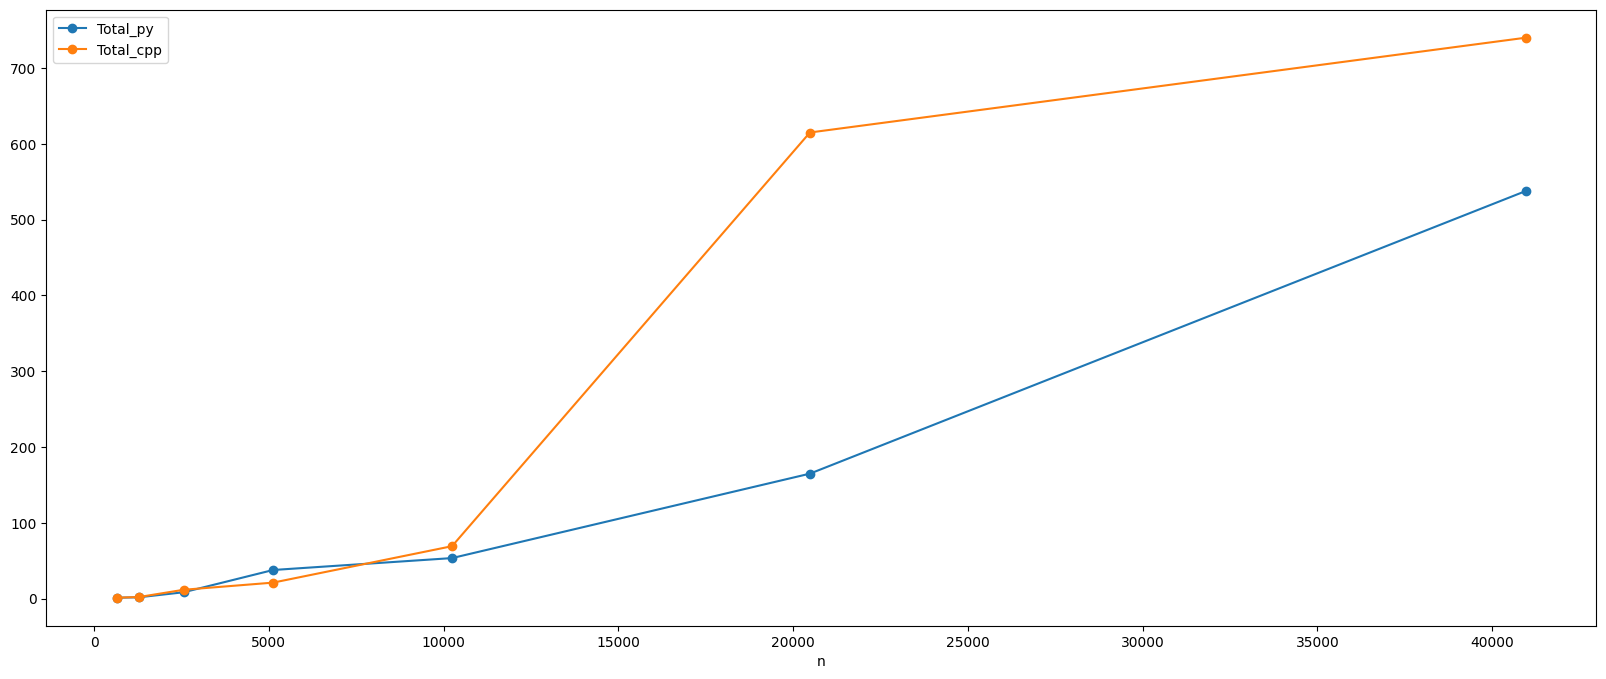

In [46]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare nodesComputation

In [47]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.058393,0.012243
1280,0.133192,0.053612
2560,0.423183,0.133913
5120,1.069567,0.147423
10240,0.843048,0.245614
20480,2.160381,2.025175
40960,7.944513,2.406813


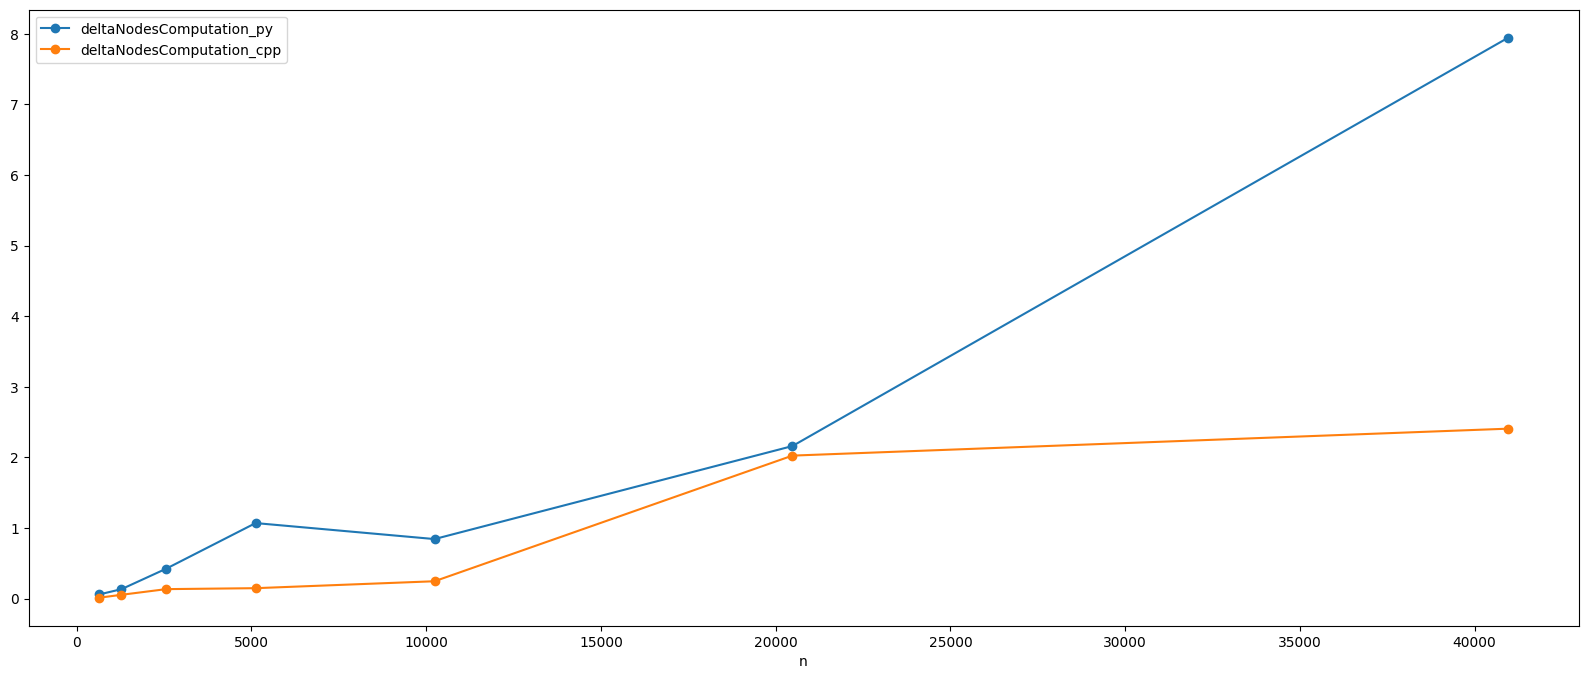

In [48]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [49]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,0.966205,1.039019
1280,1.457747,1.872805
2560,7.820978,11.376296
5120,36.491762,20.812197
10240,52.456514,68.788688
20480,162.560599,612.917403
40960,529.678346,737.612815


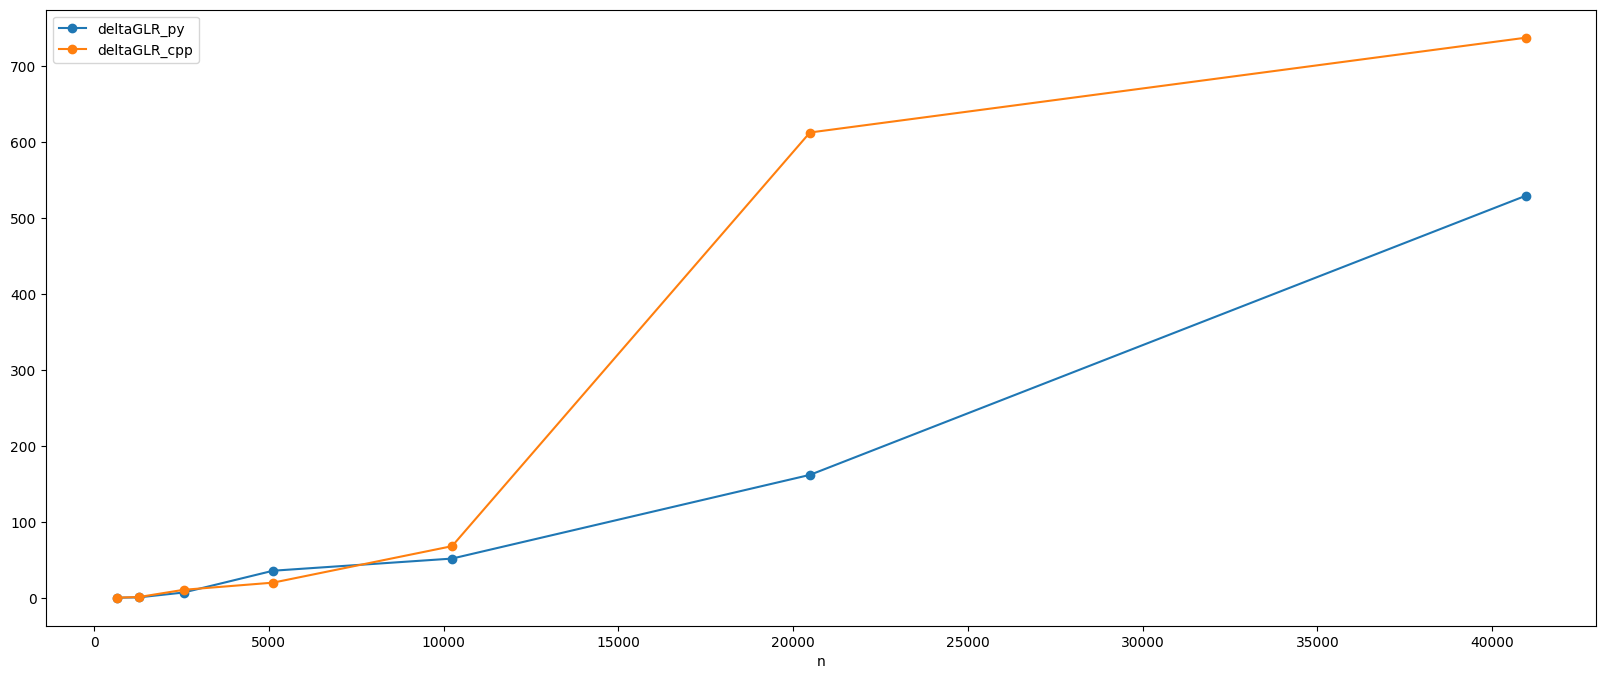

In [50]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (EXP2)

##### Filter results

In [51]:
dexpnode_ten = all_data[ all_data["Flag"] == "2expnode(fixnumbercommunity)"]
dexpnode_ten = dexpnode_ten[dexpnode_ten["Code"] == programming_language]

##### Set number of nodes as ID

In [52]:
dexpnode_ten.set_index("n", inplace=True)
dexpnode_ten.sort_index(inplace=True)

##### Show total time

In [53]:
dexpnode_ten[["Total"]]

,Total
n,
640,1.064456
1280,1.938275
2560,11.524817
5120,20.969287
10240,69.051930
20480,614.997502
40960,740.079312


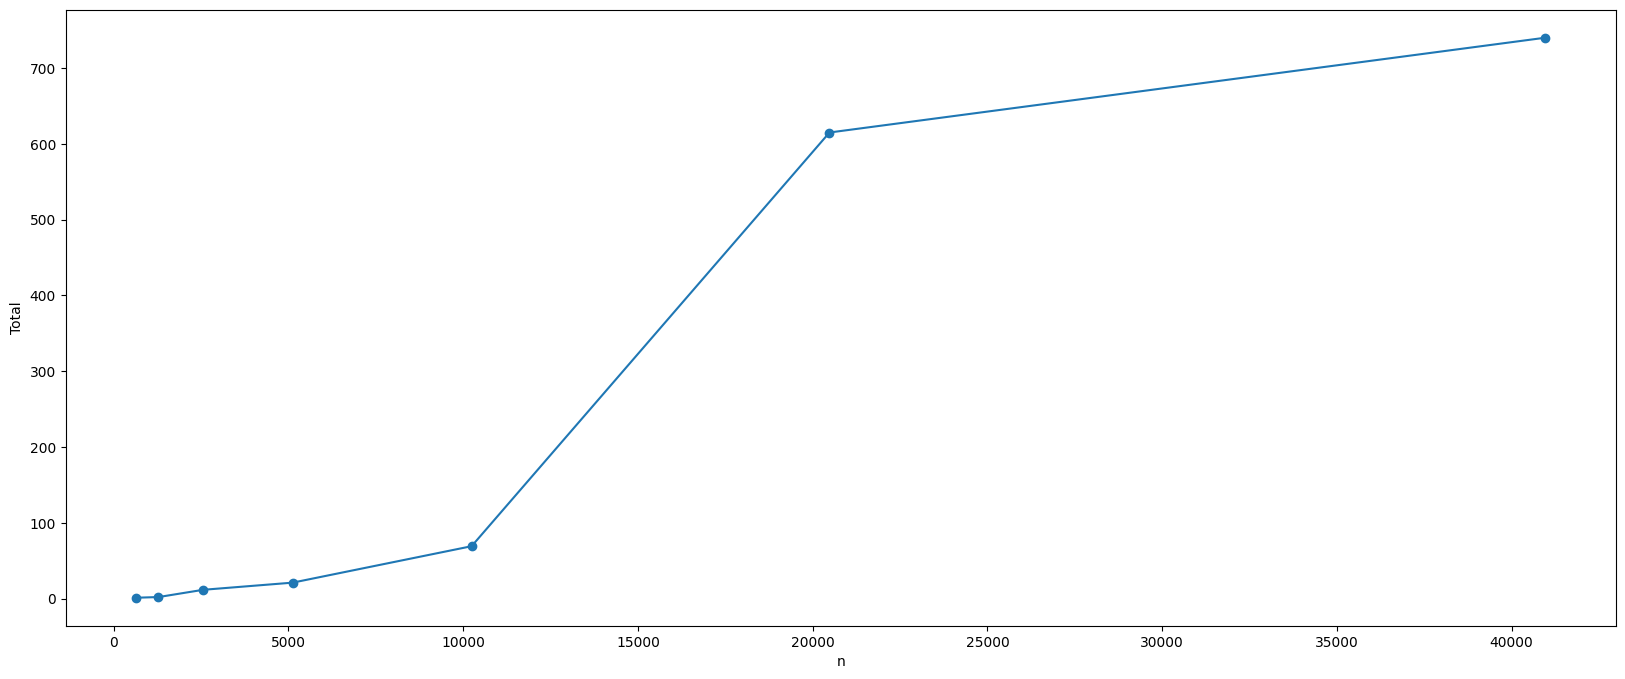

In [54]:
plot_column(dexpnode_ten, ["Total"])

##### Show nodesComputation

In [55]:
dexpnode_ten[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.012243
1280,0.053612
2560,0.133913
5120,0.147423
10240,0.245614
20480,2.025175
40960,2.406813


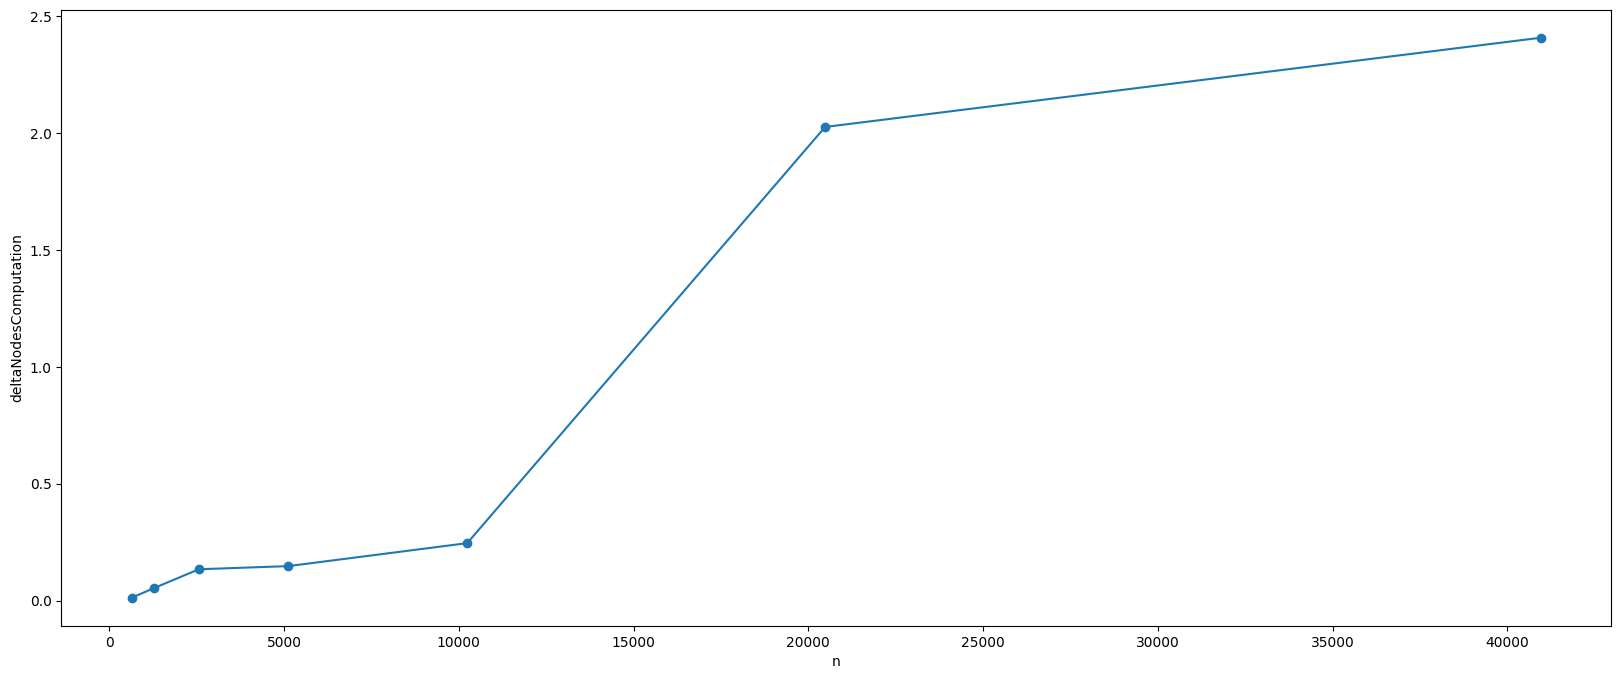

In [56]:
plot_column(dexpnode_ten, ["deltaNodesComputation"])

##### Show deltaGLR

In [57]:
dexpnode_ten[["deltaGLR"]]

,deltaGLR
n,
640,1.039019
1280,1.872805
2560,11.376296
5120,20.812197
10240,68.788688
20480,612.917403
40960,737.612815


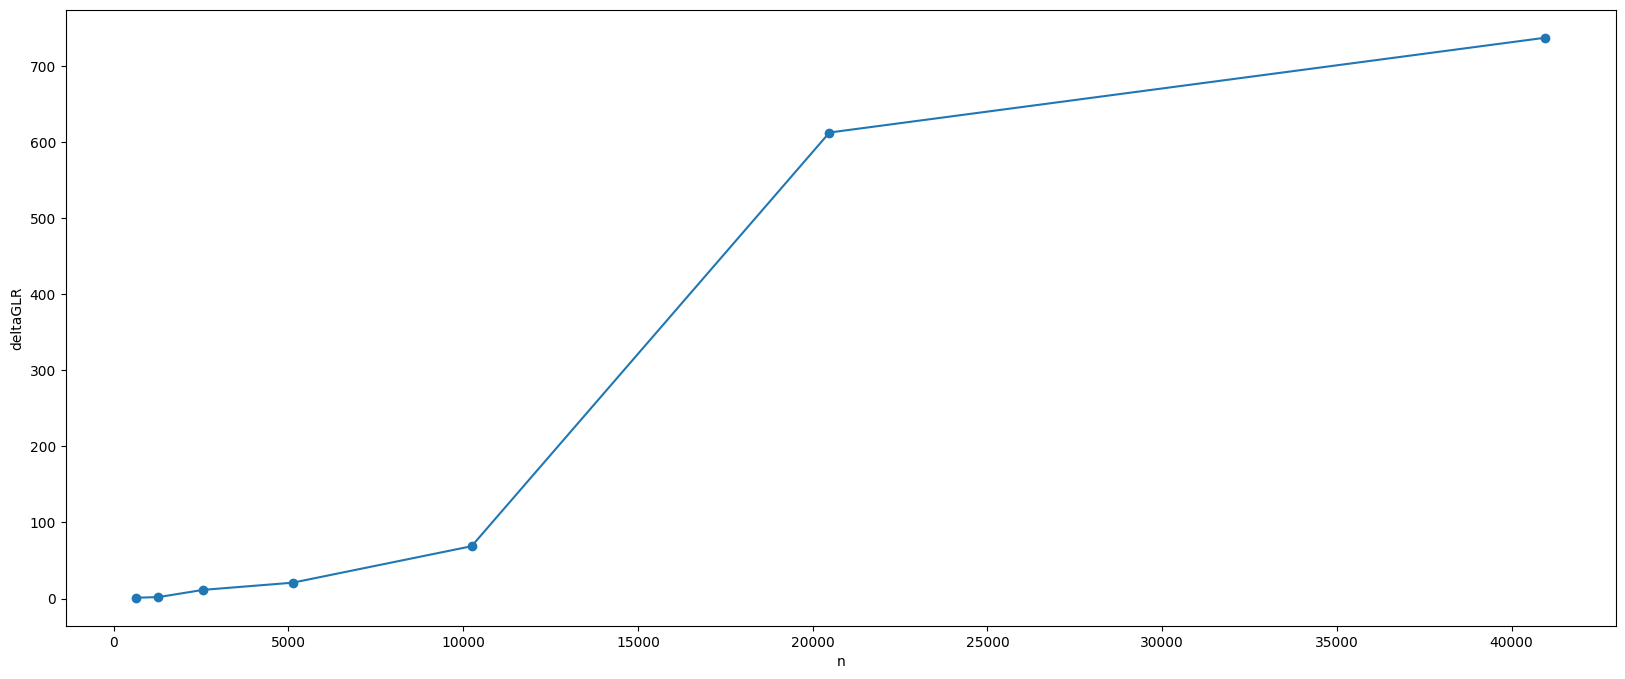

In [58]:
plot_column(dexpnode_ten, ["deltaGLR"])

# Statistics (EXP3)

In [59]:
statistics[ statistics["Flag"] == "2expcommunity"]

Code                             Graph           Flag  \
                                                              
24     C++  2expnode(n=20480, m=50000).graph  2expcommunity   
25     C++  2expnode(n=20480, m=50000).graph  2expcommunity   
26     C++  2expnode(n=20480, m=50000).graph  2expcommunity   
27     C++  2expnode(n=20480, m=50000).graph  2expcommunity   
28     C++  2expnode(n=20480, m=50000).graph  2expcommunity   
29     C++  2expnode(n=20480, m=50000).graph  2expcommunity   
30     C++  2expnode(n=20480, m=50000).graph  2expcommunity   
77  python  2expnode(n=20480, m=50000).graph  2expcommunity   
78  python  2expnode(n=20480, m=50000).graph  2expcommunity   
79  python  2expnode(n=20480, m=50000).graph  2expcommunity   
80  python  2expnode(n=20480, m=50000).graph  2expcommunity   
81  python  2expnode(n=20480, m=50000).graph  2expcommunity   
82  python  2expnode(n=20480, m=50000).graph  2expcommunity   
83  python  2expnode(n=20480, m=50000).graph  2expcommunity   

                                            Partition      n      m  \
                                                                      
24  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
25  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
26  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
27  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
28  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
29  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
30  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
77  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
78  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
79  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
80  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
81  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
82  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
83  ../partial_results/partitions/2expnode(n=20480...  20480  50000   

   Community computation                                ...  \
                   count      mean       std       min  ...   
24                   3.0  0.249834  0.094414  0.172505  ...   
25                   3.0  0.142296  0.014486  0.133602  ...   
26                   3.0  0.097434  0.032504  0.066785  ...   
27                   3.0  0.138325  0.056843  0.087949  ...   
28                   3.0  0.026689  0.010122  0.015211  ...   
29                   3.0  0.253556  0.182098  0.093759  ...   
30                   3.0  0.066385  0.048357  0.024995  ...   
77                   3.0  0.274032  0.172036  0.125783  ...   
78                   3.0  0.250410  0.144727  0.135037  ...   
79                   3.0  0.155449  0.137947  0.066575  ...   
80                   3.0  0.245048  0.186434  0.110598  ...   
81                   3.0  0.156656  0.046368  0.104347  ...   
82                   3.0  0.235490  0.162130  0.129287  ...   
83                   3.0  0.200471  0.178297  0.064818  ...   

   deltaNodesComputation            deltaGLR                          \
                     75%        max    count        mean         std   
24              2.277035   2.641704      3.0  420.472383   39.901065   
25              1.063100   1.288723      3.0  412.601663   29.281599   
26             20.831111  23.476515      3.0  303.220213   21.028299   
27              1.096923   1.443407      3.0  424.745458   35.314311   
28              1.744024   1.913278      3.0  361.475551   38.666601   
29              1.597357   2.016500      3.0  416.148310   97.234765   
30              1.708864   1.741641      3.0  372.871015   33.819566   
77             12.505358  13.480903      3.0  309.481762   76.023764   
78              5.301756   5.568266      3.0  331.162761   53.875320   
79             78.587102  79.756654      3.0  243.481530   

# Double Experiment (EXP3)

##### Filter results

In [60]:
dexpcommunity = all_data[ all_data["Flag"] == "2expcommunity"]
dexpcommunity = dexpcommunity[dexpcommunity["Code"] == programming_language]

##### Set number of community as ID

In [61]:
def get_number_community(partition_name):
    partition_name = partition_name.split("/")[-1]
    partition_id = partition_name[len("partition"):]
    return int(partition_id)

dexpcommunity["#community"] = dexpcommunity['Partition'].apply(get_number_community)
dexpcommunity.set_index("#community", inplace=True)
dexpcommunity.sort_index(inplace=True)

##### Show total time

In [62]:
dexpcommunity[["Total"]]

,Total
#community,
2,319.132959
4,363.030826
8,374.343763
16,413.659477
32,425.853062
64,417.855339
128,422.874115


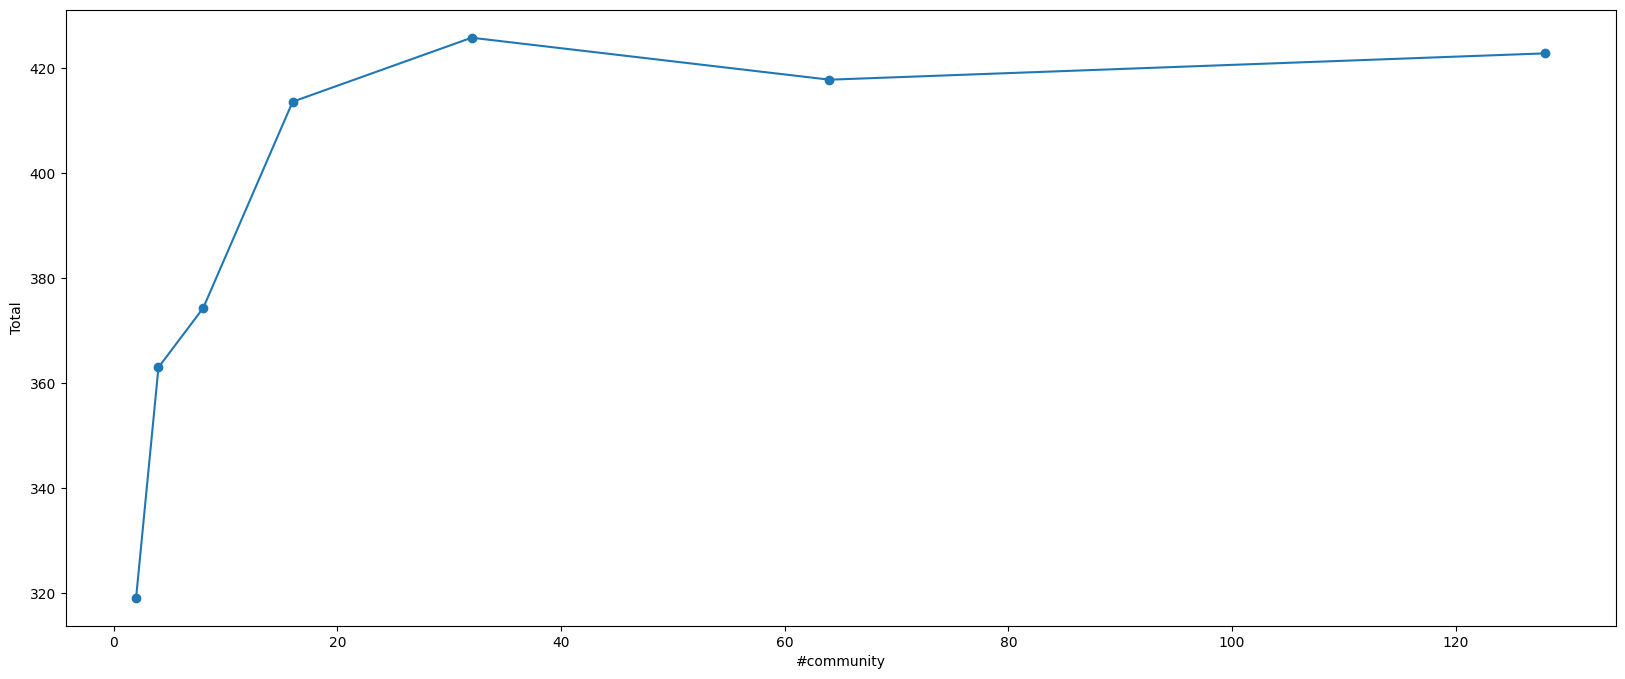

In [63]:
plot_column(dexpcommunity, ["Total"])

##### Show nodesComputation

In [64]:
dexpcommunity[["deltaNodesComputation"]]

,deltaNodesComputation
#community,
2,15.812735
4,1.525953
8,1.402836
16,0.912472
32,0.966316
64,1.449902
128,2.148706


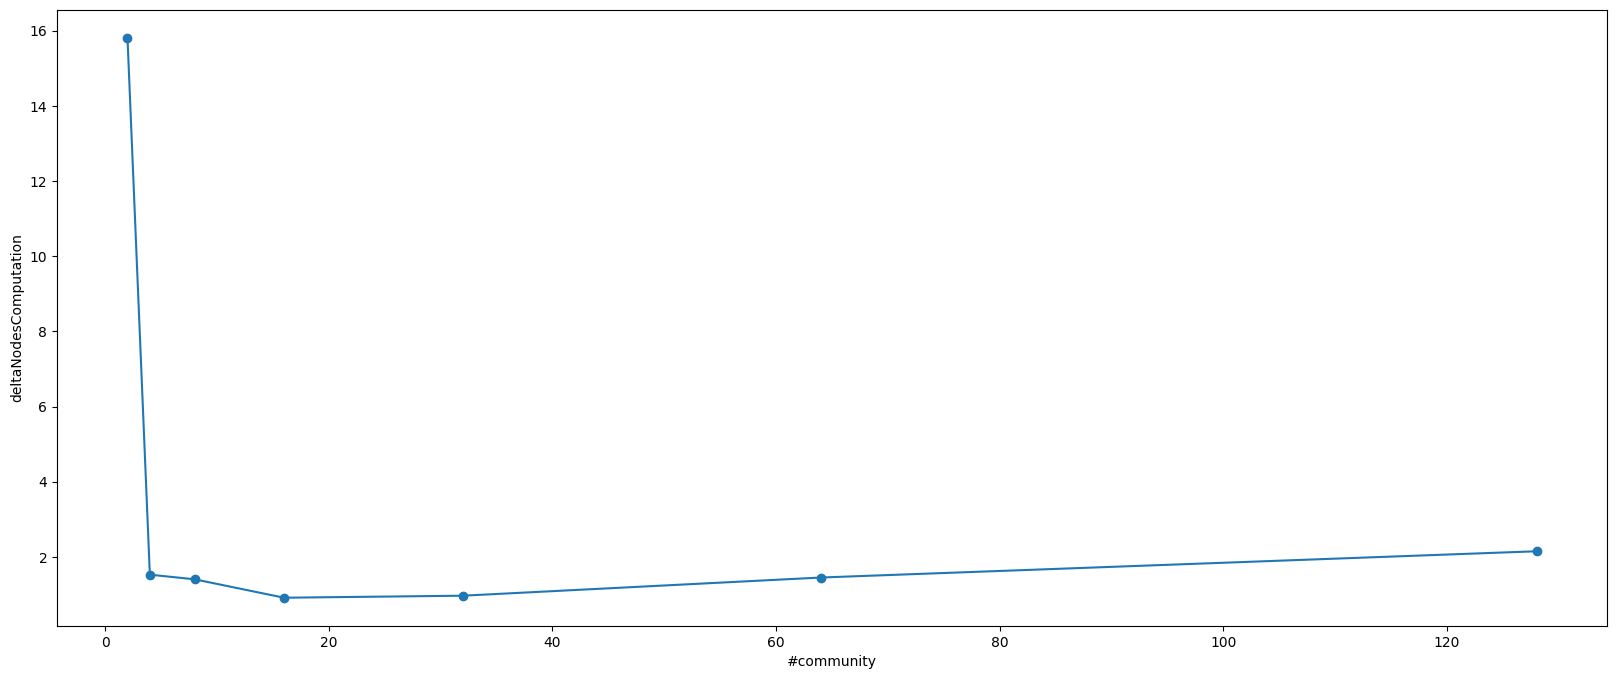

In [65]:
plot_column(dexpcommunity, ["deltaNodesComputation"])

##### Show deltaGLR

In [66]:
dexpcommunity[["deltaGLR"]]

,deltaGLR
#community,
2,303.220213
4,361.475551
8,372.871015
16,412.601663
32,424.745458
64,416.148310
128,420.472383


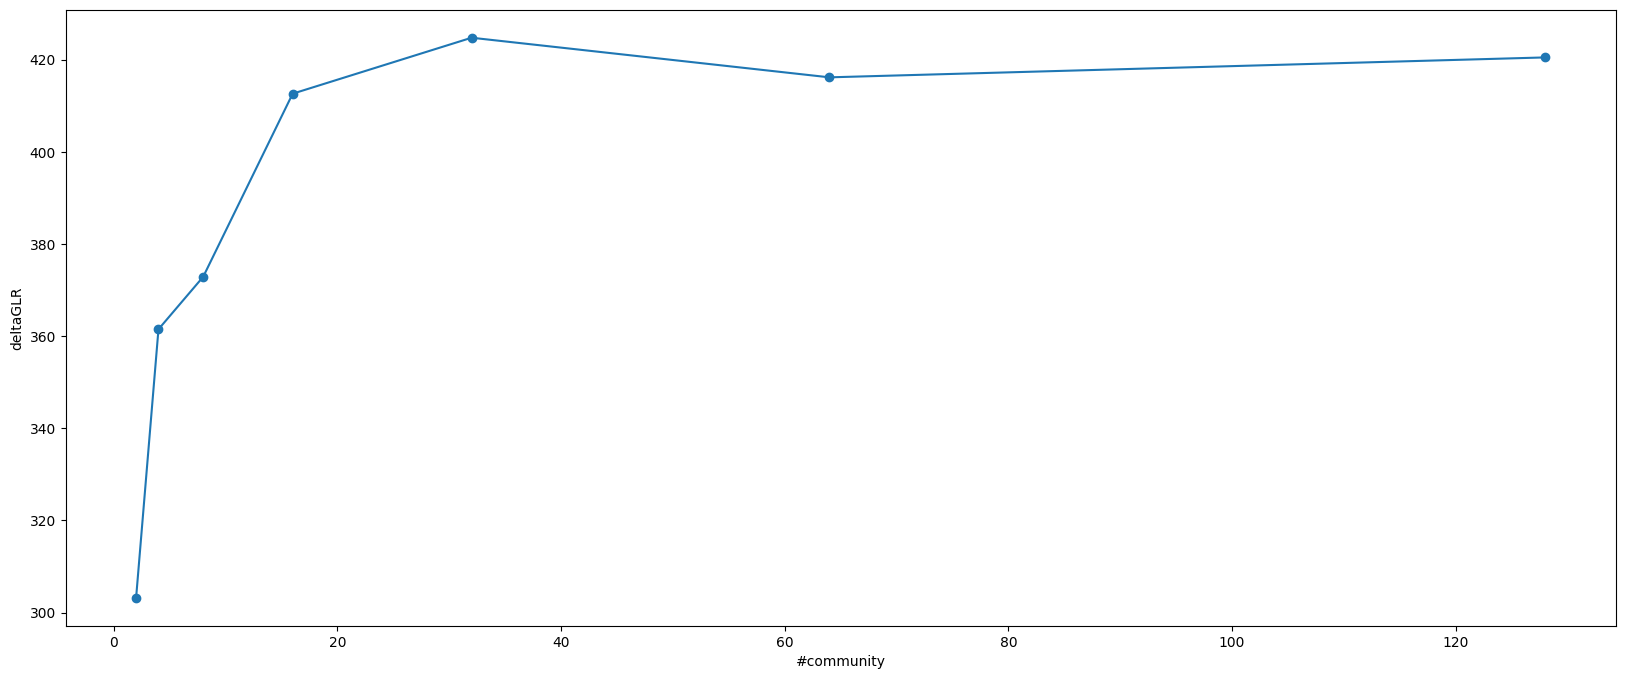

In [67]:
plot_column(dexpcommunity, ["deltaGLR"])

# Statistics (EXP4)

In [68]:
statistics[ statistics["Flag"] == "2expedge"]

Code                            Graph      Flag Partition    n       m  \
                                                                               
0      C++   2expedge(n=640, m=10224).graph  2expedge       NaN  640   10224   
2      C++    2expedge(n=640, m=1278).graph  2expedge       NaN  640    1278   
4      C++  2expedge(n=640, m=163584).graph  2expedge       NaN  640  163584   
6      C++   2expedge(n=640, m=20448).graph  2expedge       NaN  640   20448   
8      C++    2expedge(n=640, m=2556).graph  2expedge       NaN  640    2556   
10     C++   2expedge(n=640, m=40896).graph  2expedge       NaN  640   40896   
12     C++    2expedge(n=640, m=5112).graph  2expedge       NaN  640    5112   
14     C++     2expedge(n=640, m=639).graph  2expedge       NaN  640     639   
16     C++   2expedge(n=640, m=81792).graph  2expedge       NaN  640   81792   
53  python   2expedge(n=640, m=10224).graph  2expedge       NaN  640   10224   
55  python    2expedge(n=640, m=1278).graph  2expedge       NaN  640    1278   
57  python  2expedge(n=640, m=163584).graph  2expedge       NaN  640  163584   
59  python   2expedge(n=640, m=20448).graph  2expedge       NaN  640   20448   
61  python    2expedge(n=640, m=2556).graph  2expedge       NaN  640    2556   
63  python   2expedge(n=640, m=40896).graph  2expedge       NaN  640   40896   
65  python    2expedge(n=640, m=5112).graph  2expedge       NaN  640    5112   
67  python     2expedge(n=640, m=639).graph  2expedge       NaN  640     639   
69  python   2expedge(n=640, m=81792).graph  2expedge       NaN  640   81792   

   Community computation                                ...  \
                   count      mean       std       min  ...   
0                    3.0  0.149101  0.249184  0.005059  ...   
2                    3.0  0.008339  0.002782  0.006216  ...   
4                    3.0  0.023799  0.014144  0.014921  ...   
6                    3.0  0.044407  0.062333  0.008005  ...   
8                    3.0  0.008083  0.004116  0.004180  ...   
10                   3.0  0.013636  0.007865  0.005902  ...   
12                   3.0  0.013738  0.011789  0.004212  ...   
14                   3.0  0.047481  0.075327  0.002499  ...   
16                   3.0  0.042813  0.043150  0.010690  ...   
53                   3.0  0.188965  0.295322  0.009007  ...   
55                   3.0  0.013093  0.008079  0.008030  ...   
57                   3.0  0.840655  1.376980  0.018116  ...   
59                   3.0  0.121965  0.189447  0.007652  ...   
61                   3.0  0.144080  0.223067  0.013808  ...   
63                   3.0  0.269335  0.425575  0.016805  ...   
65                   3.0  0.040933  0.054530  0.007612  ...   
67                   3.0  0.020609  0.018732  0.005041  ...   
69                   3.0  0.465223  0.665667  0.066333  ...   

   deltaNodesComputation           deltaGLR                                \
                     75%       max    count      mean       std       min   
0               0.016087  0.016200      3.0  0.453536  0.183235  0.343999   
2               0.009488  0.016324      3.0  0.140848  0.063963  0.101255   
4               0.031841  0.046259      3.0  3.658205  1.533601  2.552782   
6               0.017916  0.024115      3.0  0.409539  0.158517  0.297771   
8               0.047288  0.090676      3.0  0.223941  0.110709  0.145662   
10              0.031558  0.051937      3.0  0.911632  0.291237  0.735548   
12              0.006784  0.009120      3.0  0.298955  0.082946  0.248291   
14              0.003891  0.005511      3.0  0.108838  0.037282  0.087089   
16              0.033840  0.037855      3.0  2.383431  0.896136  1.857752   
53              0.048375  0.073261      3.0  0.510872  0.250925  0.342530   
55              0.024204  0.024241      3.0  0.225616  0.106784  0.153710   
57              0.135745  0.148866      3.0  3.517631  1.715192  2.453062   
59              0.042865  0.043711      3.0  0.566876  0.316200  0

# Double Experiment (EXP4)

##### Filter results

In [69]:
dexpedge = all_data[ all_data["Flag"] == "2expedge"]
dexpedge = dexpedge[dexpedge["Code"] == programming_language]

##### Set number of edges as ID

In [70]:
dexpedge.set_index("m", inplace=True)
dexpedge.sort_index(inplace=True)

##### Show total time

In [71]:
dexpedge[["Total"]]

,Total
m,
639,0.159482
1278,0.156320
2556,0.264430
5112,0.318398
10224,0.614976
20448,0.469246
40896,0.949992
81792,2.456812
163584,3.707897


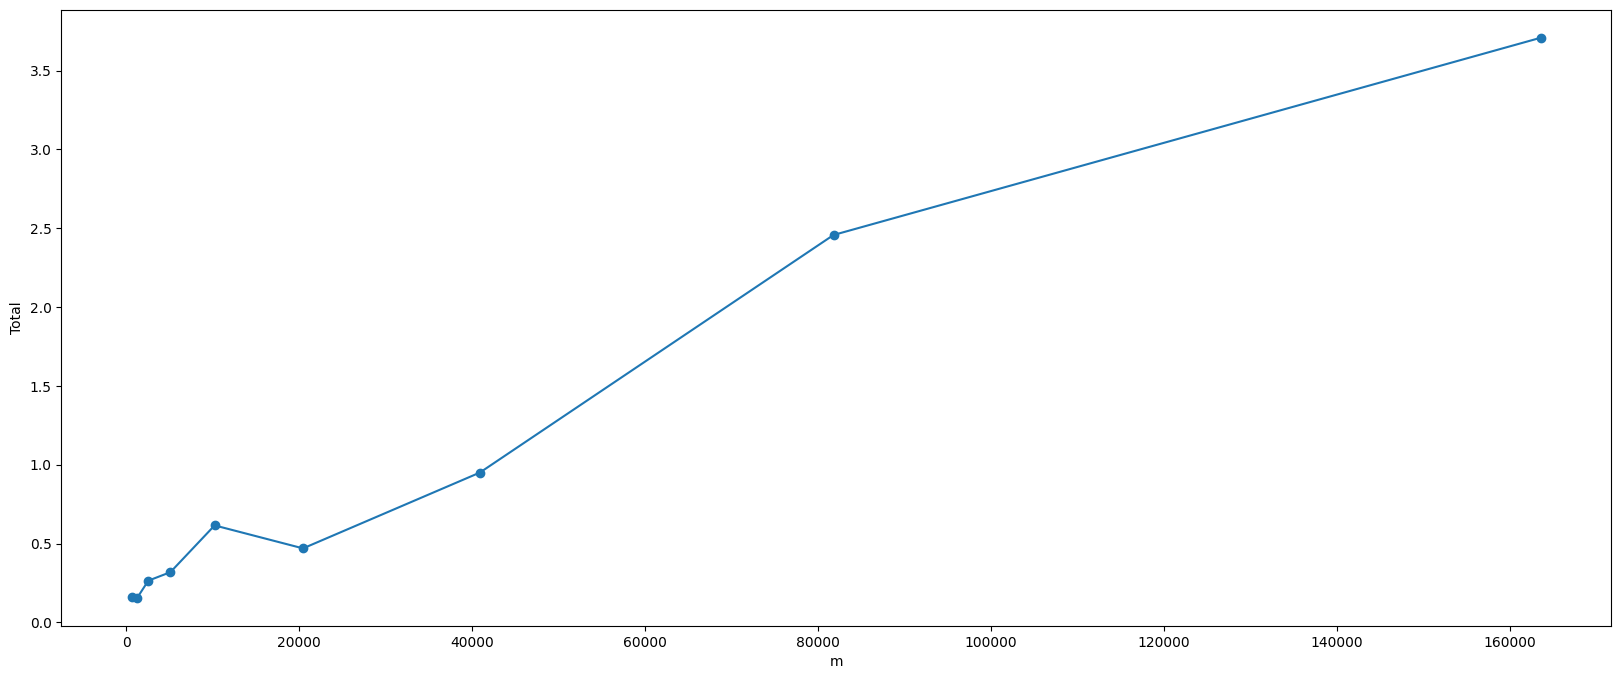

In [72]:
plot_column(dexpedge, ["Total"])

##### Show partitionsComputation

In [73]:
dexpedge[["Community computation"]]

,Community computation
m,
639,0.047481
1278,0.008339
2556,0.008083
5112,0.013738
10224,0.149101
20448,0.044407
40896,0.013636
81792,0.042813
163584,0.023799


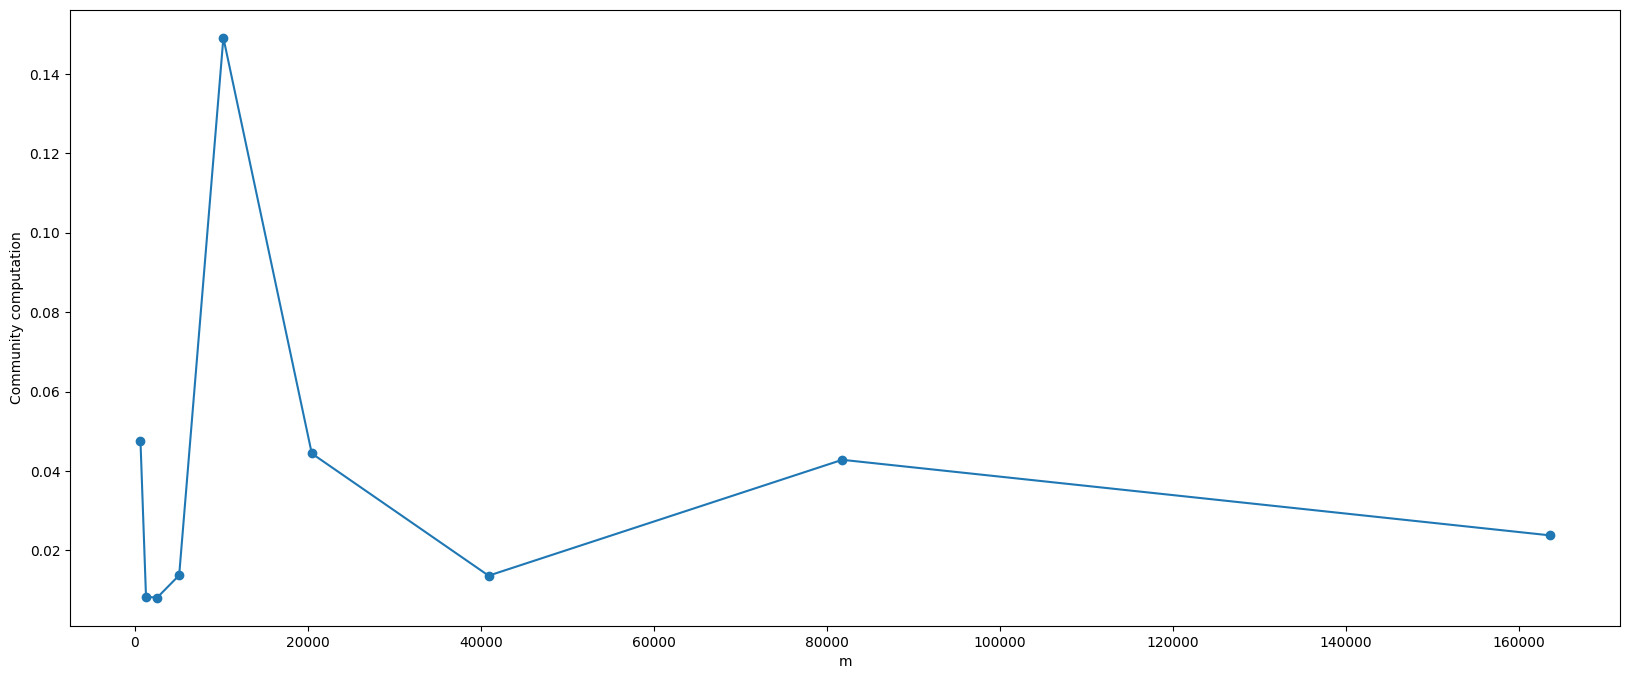

In [74]:
plot_column(dexpedge, ["Community computation"])

##### Show nodesComputation

In [75]:
dexpedge[["deltaNodesComputation"]]

,deltaNodesComputation
m,
639,0.003086
1278,0.007069
2556,0.032346
5112,0.005649
10224,0.012285
20448,0.015249
40896,0.024670
81792,0.030514
163584,0.025816


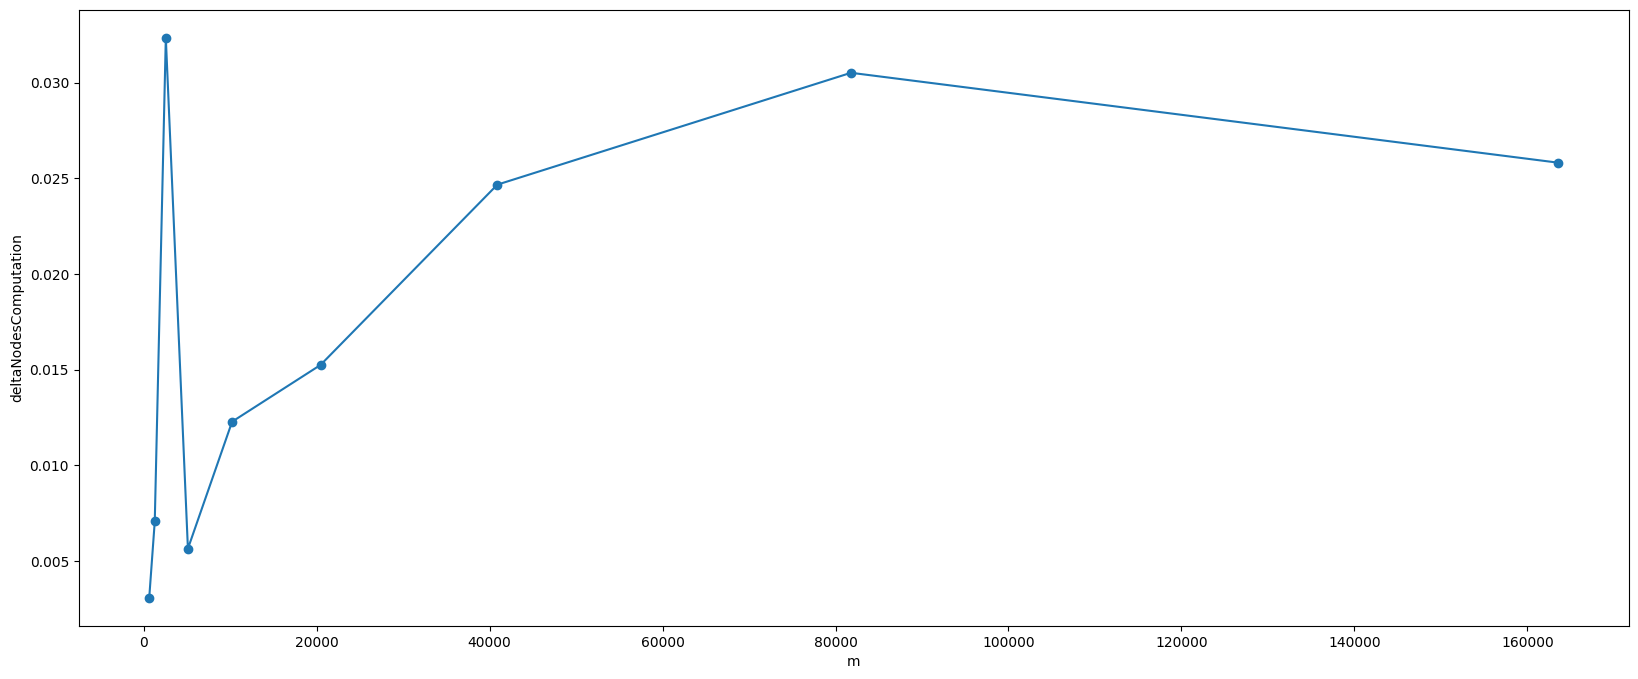

In [76]:
plot_column(dexpedge, ["deltaNodesComputation"])

##### Show deltaGLR

In [77]:
dexpedge[["deltaGLR"]]

,deltaGLR
m,
639,0.108838
1278,0.140848
2556,0.223941
5112,0.298955
10224,0.453536
20448,0.409539
40896,0.911632
81792,2.383431
163584,3.658205


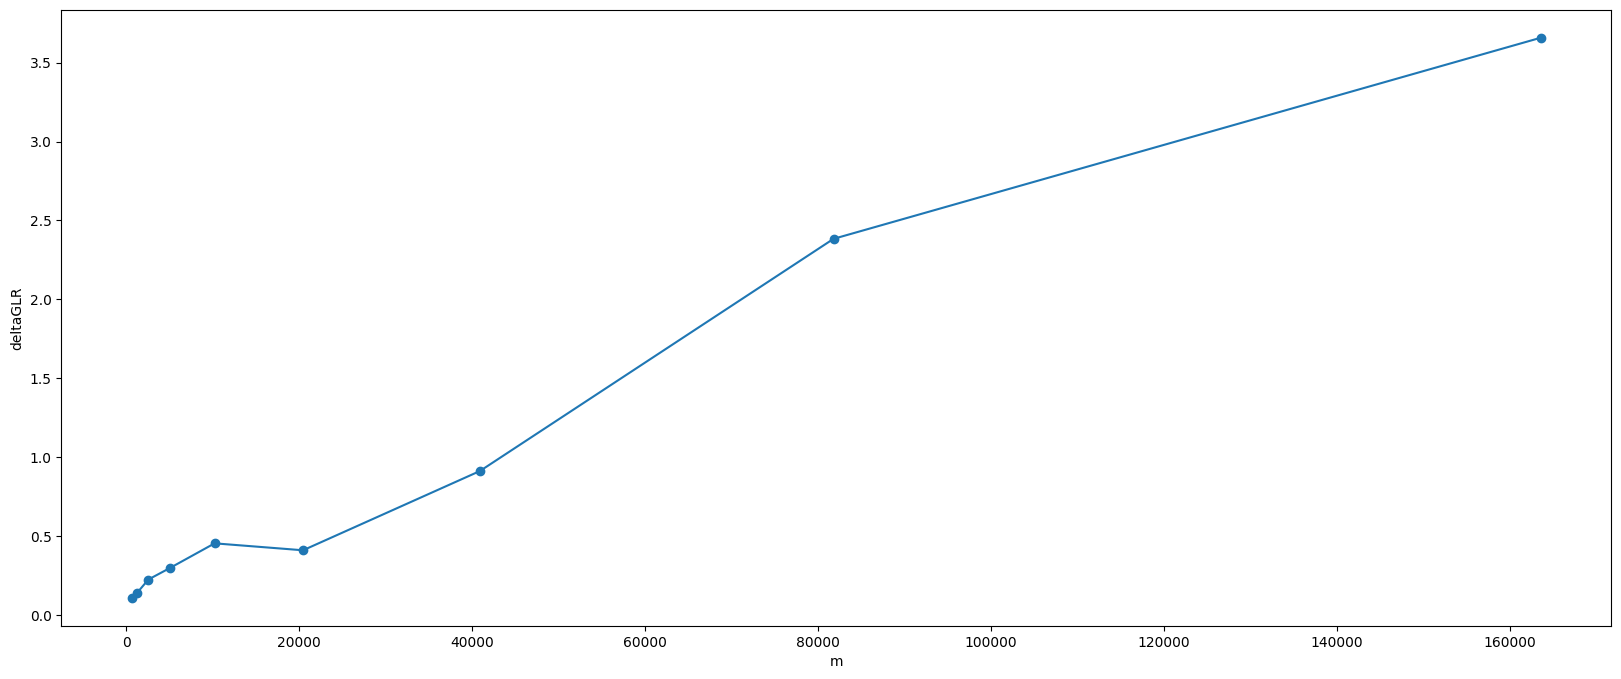

In [78]:
plot_column(dexpedge, ["deltaGLR"])

# Statistics (EXP5)

In [79]:
statistics[ statistics["Flag"] == "2expnodeundirected(fixpartition)"]

Code                             Graph  \
                                                
20      C++  2expnode(n=10240, m=50000).graph   
23      C++   2expnode(n=1280, m=50000).graph   
40      C++  2expnode(n=20480, m=50000).graph   
43      C++   2expnode(n=2560, m=50000).graph   
46      C++  2expnode(n=40960, m=50000).graph   
49      C++   2expnode(n=5120, m=50000).graph   
52      C++    2expnode(n=640, m=50000).graph   
73   python  2expnode(n=10240, m=50000).graph   
76   python   2expnode(n=1280, m=50000).graph   
93   python  2expnode(n=20480, m=50000).graph   
96   python   2expnode(n=2560, m=50000).graph   
99   python  2expnode(n=40960, m=50000).graph   
102  python   2expnode(n=5120, m=50000).graph   
105  python    2expnode(n=640, m=50000).graph   

                                 Flag  \
                                        
20   2expnodeundirected(fixpartition)   
23   2expnodeundirected(fixpartition)   
40   2expnodeundirected(fixpartition)   
43   2expnodeundirected(fixpartition)   
46   2expnodeundirected(fixpartition)   
49   2expnodeundirected(fixpartition)   
52   2expnodeundirected(fixpartition)   
73   2expnodeundirected(fixpartition)   
76   2expnodeundirected(fixpartition)   
93   2expnodeundirected(fixpartition)   
96   2expnodeundirected(fixpartition)   
99   2expnodeundirected(fixpartition)   
102  2expnodeundirected(fixpartition)   
105  2expnodeundirected(fixpartition)   

                                             Partition      n      m  \
                                                                       
20   ../partial_results/partitions/partition10//2ex...  10240  50000   
23   ../partial_results/partitions/partition10//2ex...   1280  50000   
40   ../partial_results/partitions/partition10//2ex...  20480  50000   
43   ../partial_results/partitions/partition10//2ex...   2560  50000   
46   ../partial_results/partitions/partition10//2ex...  40960  50000   
49   ../partial_results/partitions/partition10//2ex...   5120  50000   
52   ../partial_results/partitions/partition10//2ex...    640  50000   
73   ../partial_results/partitions/partition10//2ex...  10240  50000   
76   ../partial_results/partitions/partition10//2ex...   1280  50000   
93   ../partial_results/partitions/partition10//2ex...  20480  50000   
96   ../partial_results/partitions/partition10//2ex...   2560  50000   
99   ../partial_results/partitions/partition10//2ex...  40960  50000   
102  ../partial_results/partitions/partition10//2ex...   5120  50000   
105  ../partial_results/partitions/partition10//2ex...    640  50000   

    Community computation                                ...  \
                    count      mean       std       min  ...   
20                   10.0  0.026603  0.025358  0.009852  ...   
23                   10.0  0.015048  0.015731  0.004582  ...   
40                   10.0  0.038250  0.019455  0.017855  ...   
43                   10.0  0.014145  0.018613  0.005091  ...   
46                   10.0  0.043430  0.011667  0.030830  ...   
49                   10.0  0.017062  0.017215  0.006670  ...   
52                   10.0  0.018188  0.015370  0.003845  ...   
73                   10.0  0.042942  0.027789  0.006523  ...   
76                   10.0  0.012719  0.007382  0.004626  ...   
93                   10.0  0.058068  0.017540  0.041253  ...   
96                   10.0  0.024871  0.023581  0.006085  ...   
99                   10.0  0.077710  0.025582  0.058959  ...   
102                  10.0  0.022857  0.016780  0.005293  ...   
105                  10.0  0.010132  0.007574  0.003707  ...   

    deltaNodesComputation           deltaGLR                                \
                      75%       max    count      mean       std       min   
20               0.242522  0.349924     10.0  0.004886  0.000830  0.003909   
23               0.040360  0.071196     10.0  0.001084  0.000024  0.001036   
40               0.686659  0.841194     10.0  0.012257  0.003172  0.008671 

# Double Experiment (EXP5)

##### Filter results

In [80]:
dexpnodeundirected = all_data[ all_data["Flag"] == "2expnodeundirected(fixpartition)"]
dexpnodeundirected = dexpnodeundirected[dexpnodeundirected["Code"] == programming_language]

##### Set number of node as ID

In [81]:
dexpnodeundirected.set_index("n", inplace=True)
dexpnodeundirected.sort_index(inplace=True)

##### Show total time

In [82]:
dexpnodeundirected[["Total"]]

,Total
n,
640,0.037715
1280,0.054657
2560,0.132585
5120,0.176896
10240,0.244762
20480,0.523230
40960,1.873114


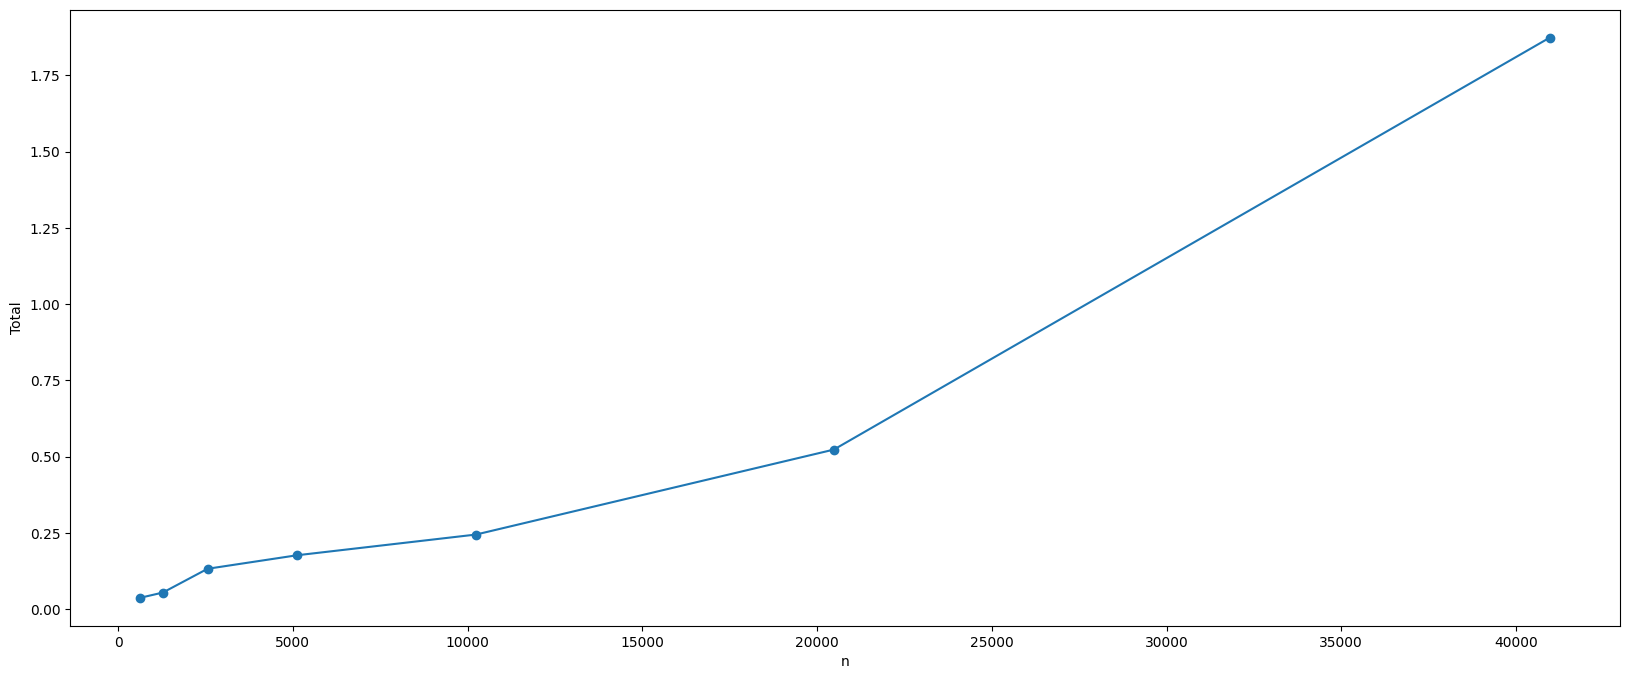

In [83]:
plot_column(dexpnodeundirected, ["Total"])

##### Show nodesComputation

In [84]:
dexpnodeundirected[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.018567
1280,0.038500
2560,0.116735
5120,0.156818
10240,0.212967
20480,0.471955
40960,1.808781


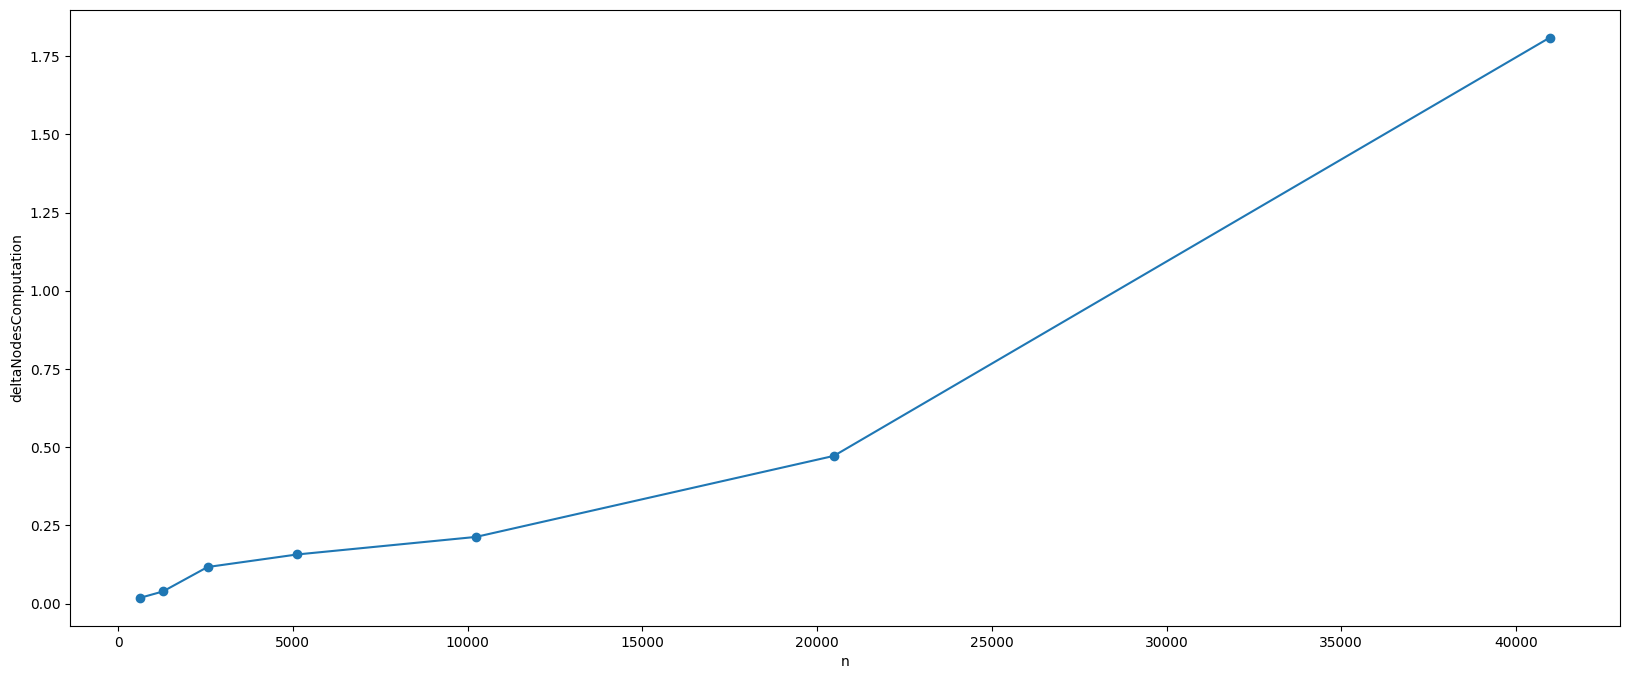

In [85]:
plot_column(dexpnodeundirected, ["deltaNodesComputation"])

##### Show deltaGLR

In [86]:
dexpnodeundirected[["deltaGLR"]]

,deltaGLR
n,
640,0.000942
1280,0.001084
2560,0.001642
5120,0.002821
10240,0.004886
20480,0.012257
40960,0.018703


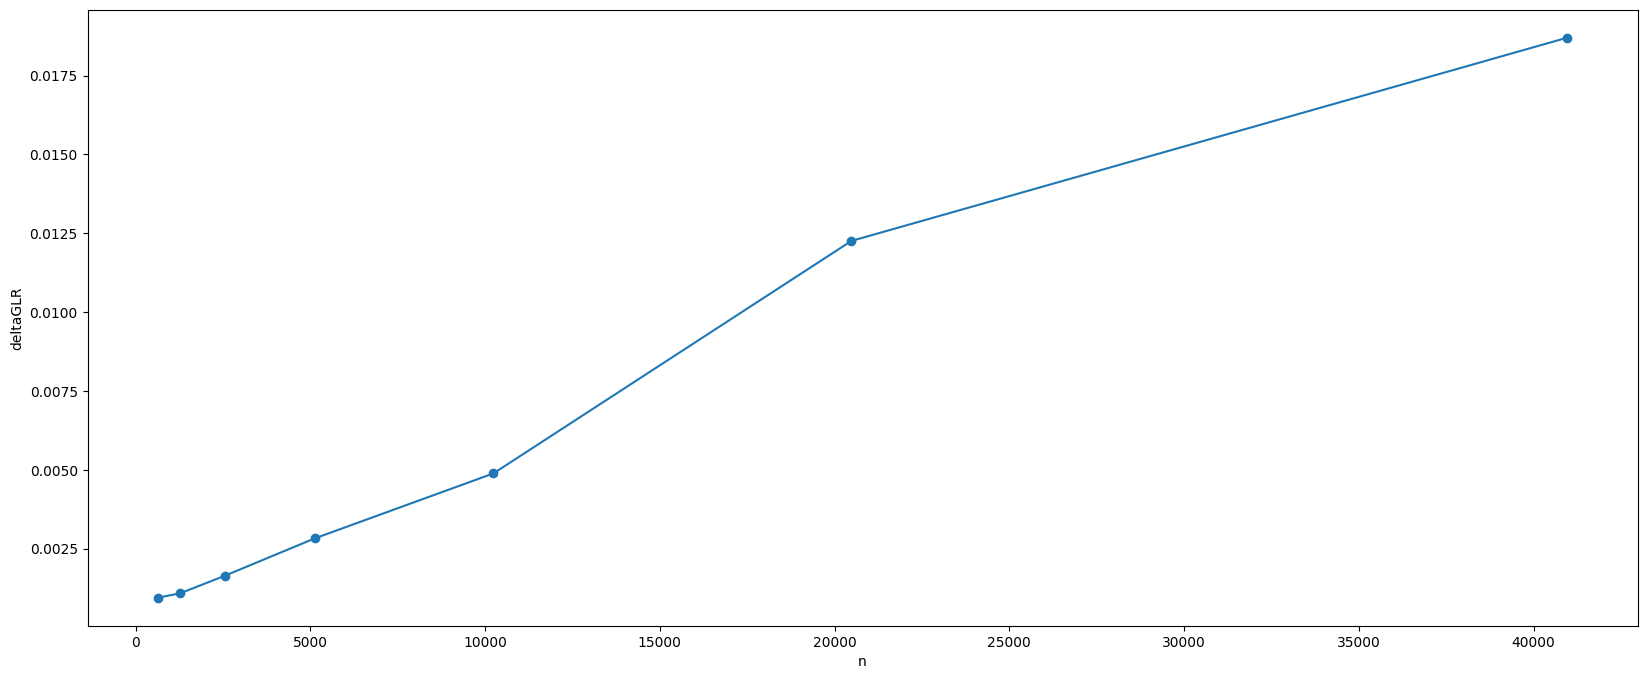

In [87]:
plot_column(dexpnodeundirected, ["deltaGLR"])

# Programming Language Comparison (EXP5)

##### Filter results

In [88]:
all_comparison = all_data[all_data["Flag"] == "2expnodeundirected(fixpartition)"]

In [89]:
py_comparison = all_comparison[all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"],
                      suffixes=("_py", "_cpp"))
comparison

,Graph,Flag,Partition,n,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=10240, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,10240,0.042942,0.903955,0.981321,0.983712,0.861013,0.077366,0.026603,0.239570,0.244456,0.244762,0.212967,0.004886
1,"2expnode(n=1280, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,1280,0.012719,0.148440,0.169917,0.177190,0.135721,0.021476,0.015048,0.053548,0.054631,0.054657,0.038500,0.001084
2,"2expnode(n=20480, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,20480,0.058068,2.100210,2.229685,2.232958,2.042142,0.129475,0.038250,0.510205,0.522462,0.523230,0.471955,0.012257
3,"2expnode(n=2560, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,2560,0.024871,0.475950,0.500453,0.501007,0.451079,0.024503,0.014145,0.130879,0.132522,0.132585,0.116735,0.001642
4,"2expnode(n=40960, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,40960,0.077710,7.342861,7.596544,7.604349,7.265151,0.253683,0.043430,1.852212,1.870915,1.873114,1.808781,0.018703
5,"2expnode(n=5120, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,5120,0.022857,0.692653,0.748375,0.750087,0.669797,0.055722,0.017062,0.173880,0.176702,0.176896,0.156818,0.002821
6,"2expnode(n=640, m=50000).graph",2expnodeundirected(fixpartition),../partial_results/partitions/partition10//2ex...,640,0.010132,0.062938,0.089762,0.089964,0.052806,0.026825,0.018188,0.036755,0.037697,0.037715,0.018567,0.000942


##### Set number of nodes as ID

In [90]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [91]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,0.089964,0.037715
1280,0.177190,0.054657
2560,0.501007,0.132585
5120,0.750087,0.176896
10240,0.983712,0.244762
20480,2.232958,0.523230
40960,7.604349,1.873114


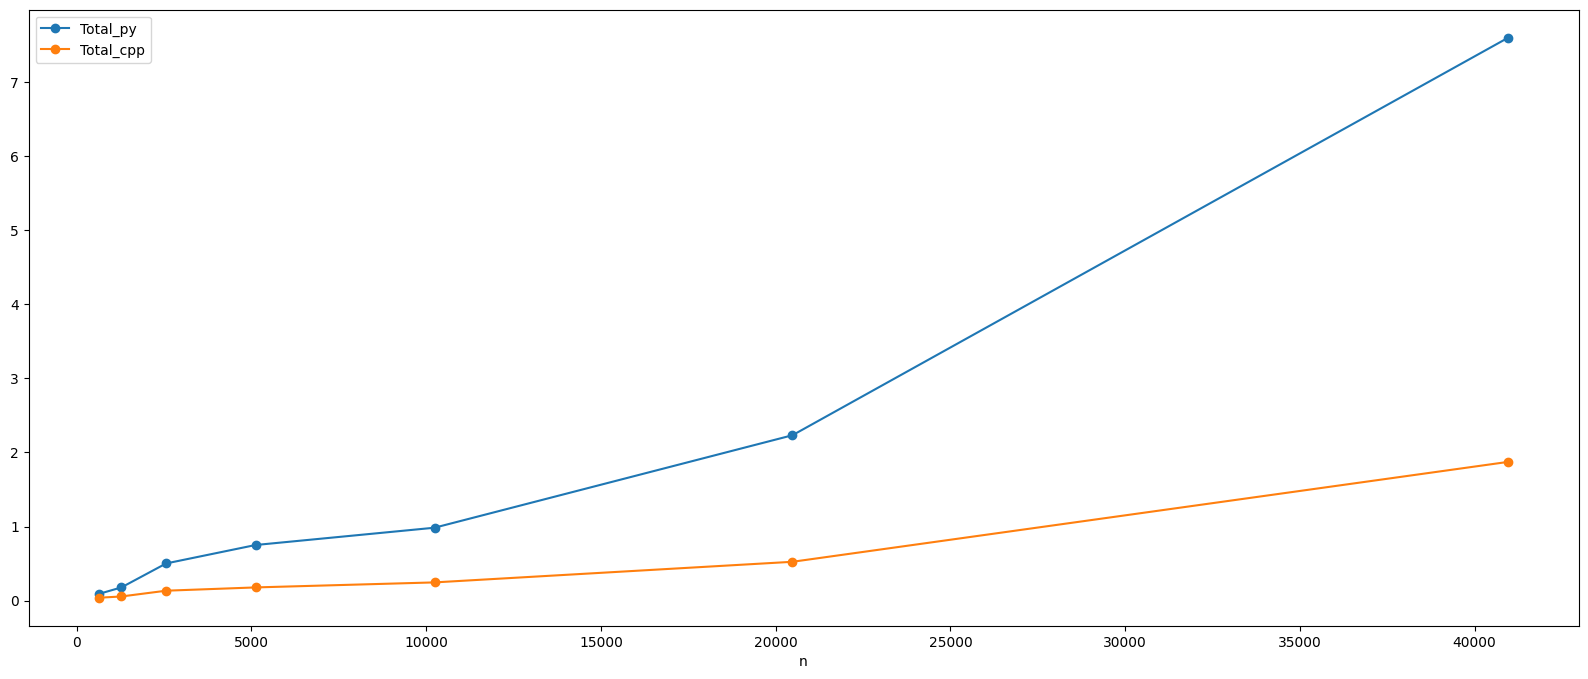

In [92]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare nodesComputation

In [93]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.052806,0.018567
1280,0.135721,0.038500
2560,0.451079,0.116735
5120,0.669797,0.156818
10240,0.861013,0.212967
20480,2.042142,0.471955
40960,7.265151,1.808781


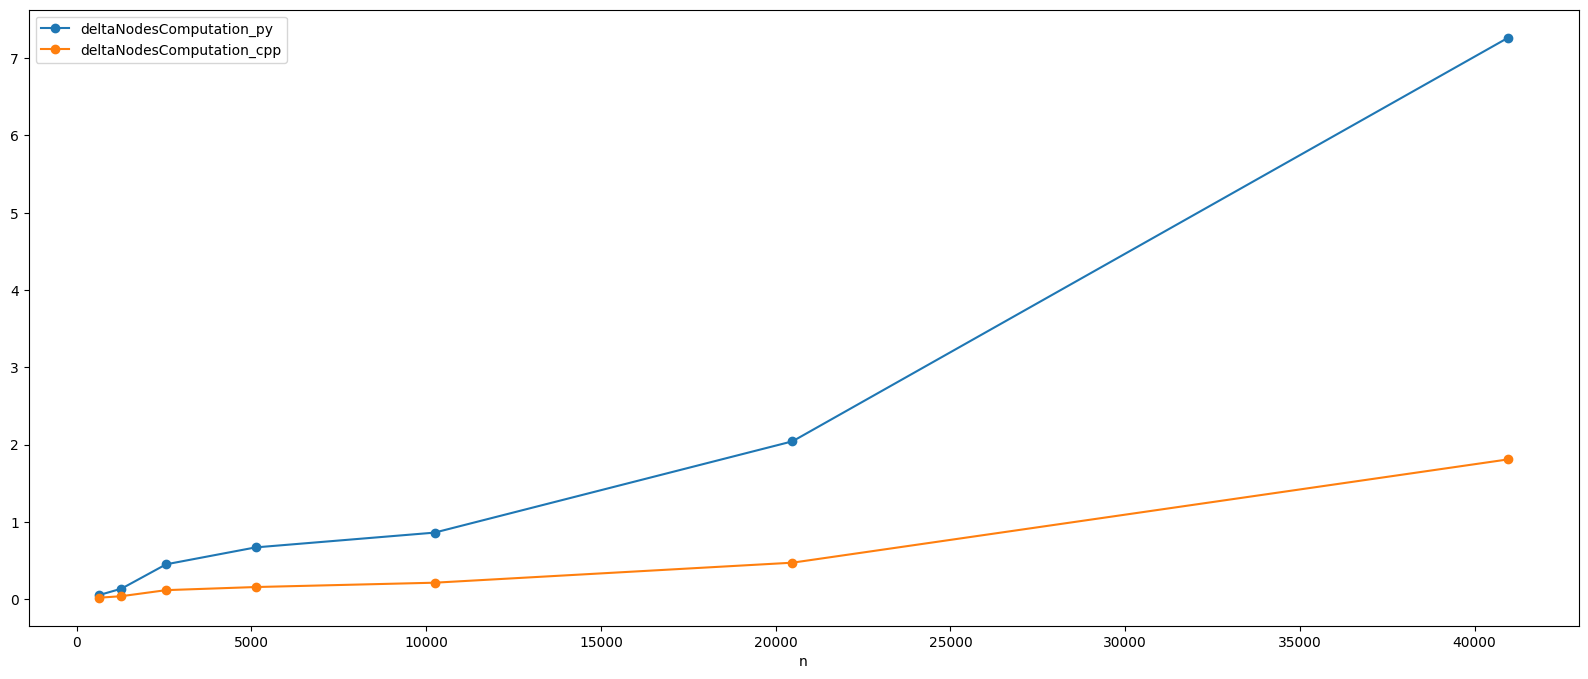

In [94]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [95]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,0.026825,0.000942
1280,0.021476,0.001084
2560,0.024503,0.001642
5120,0.055722,0.002821
10240,0.077366,0.004886
20480,0.129475,0.012257
40960,0.253683,0.018703


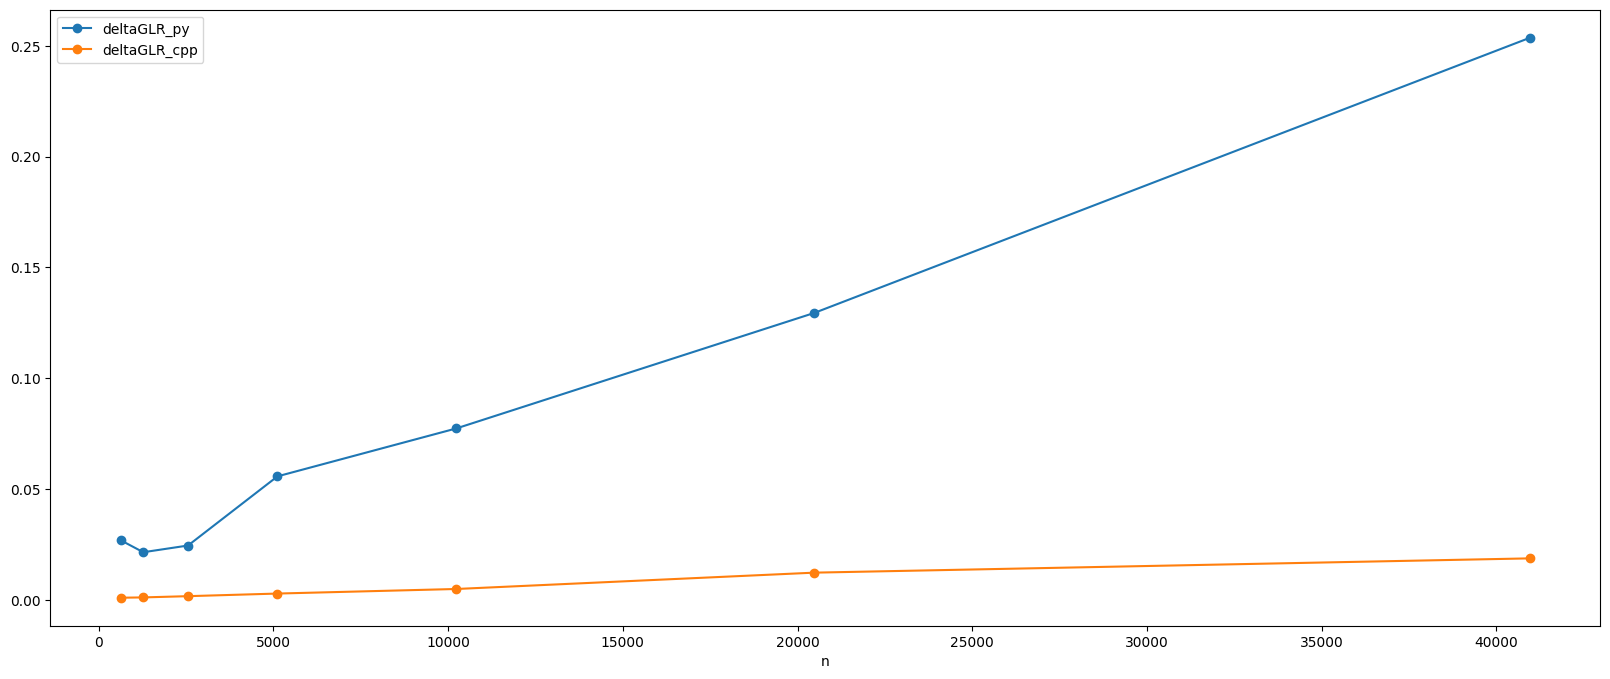

In [96]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Statistics (EXP6)

In [97]:
statistics[ statistics["Flag"] == "2expcommunityundirected"]

Code                             Graph                     Flag  \
                                                                        
31     C++  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
32     C++  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
33     C++  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
34     C++  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
35     C++  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
36     C++  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
37     C++  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
84  python  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
85  python  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
86  python  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
87  python  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
88  python  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
89  python  2expnode(n=20480, m=50000).graph  2expcommunityundirected   
90  python  2expnode(n=20480, m=50000).graph  2expcommunityundirected   

                                            Partition      n      m  \
                                                                      
31  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
32  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
33  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
34  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
35  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
36  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
37  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
84  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
85  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
86  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
87  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
88  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
89  ../partial_results/partitions/2expnode(n=20480...  20480  50000   
90  ../partial_results/partitions/2expnode(n=20480...  20480  50000   

   Community computation                                ...  \
                   count      mean       std       min  ...   
31                  10.0  0.170738  0.020112  0.143488  ...   
32                  10.0  0.046935  0.021617  0.024030  ...   
33                  10.0  0.025480  0.018293  0.010027  ...   
34                  10.0  0.071495  0.023538  0.039062  ...   
35                  10.0  0.016313  0.006345  0.010113  ...   
36                  10.0  0.094496  0.013537  0.077697  ...   
37                  10.0  0.031238  0.021678  0.013814  ...   
84                  10.0  0.128428  0.008282  0.116100  ...   
85                  10.0  0.070494  0.017110  0.049664  ...   
86                  10.0  0.050058  0.049982  0.007128  ...   
87                  10.0  0.072551  0.017485  0.058095  ...   
88                  10.0  0.042102  0.016709  0.009193  ...   
89                  10.0  0.093702  0.010563  0.081940  ...   
90                  10.0  0.058729  0.006494  0.049559  ...   

   deltaNodesComputation            deltaGLR                                \
                     75%        max    count      mean       std       min   
31              1.362244   1.374449     10.0  0.117562  0.006835  0.109459   
32              0.524531   0.588087     10.0  0.014598  0.002230  0.011593   
33             15.053862  15.959442     10.0  0.004374  0.002635  0.002358   
34              0.560817   0.649152     10.0  0.028869  0.004530  0.021588   
35              2.781945   2.881219     10.0  0.004242  0.000959  0.003316   
36              0.960056   0.968984     10.0  0.059167  0.007693  0.048934   
37              1.076906   1.161424     10.0  0.007097  0.001011  0

# Double Experiment (EXP6)

##### Filter results

In [98]:
dexpcommunityundirected = all_data[ all_data["Flag"] == "2expcommunityundirected"]
dexpcommunityundirected = dexpcommunityundirected[dexpcommunityundirected["Code"] == programming_language]

##### Set number of community as ID

In [99]:
def get_number_community(partition_name):
    partition_name = partition_name.split("/")[-1]
    partition_id = partition_name[len("partition"):]
    return int(partition_id)

dexpcommunityundirected["#community"] = dexpcommunityundirected['Partition'].apply(get_number_community)
dexpcommunityundirected.set_index("#community", inplace=True)
dexpcommunityundirected.sort_index(inplace=True)

##### Show total time

In [100]:
dexpcommunityundirected[["Total"]]

,Total
#community,
2,14.212054
4,1.348745
8,0.727738
16,0.506903
32,0.651209
64,1.082843
128,1.629769


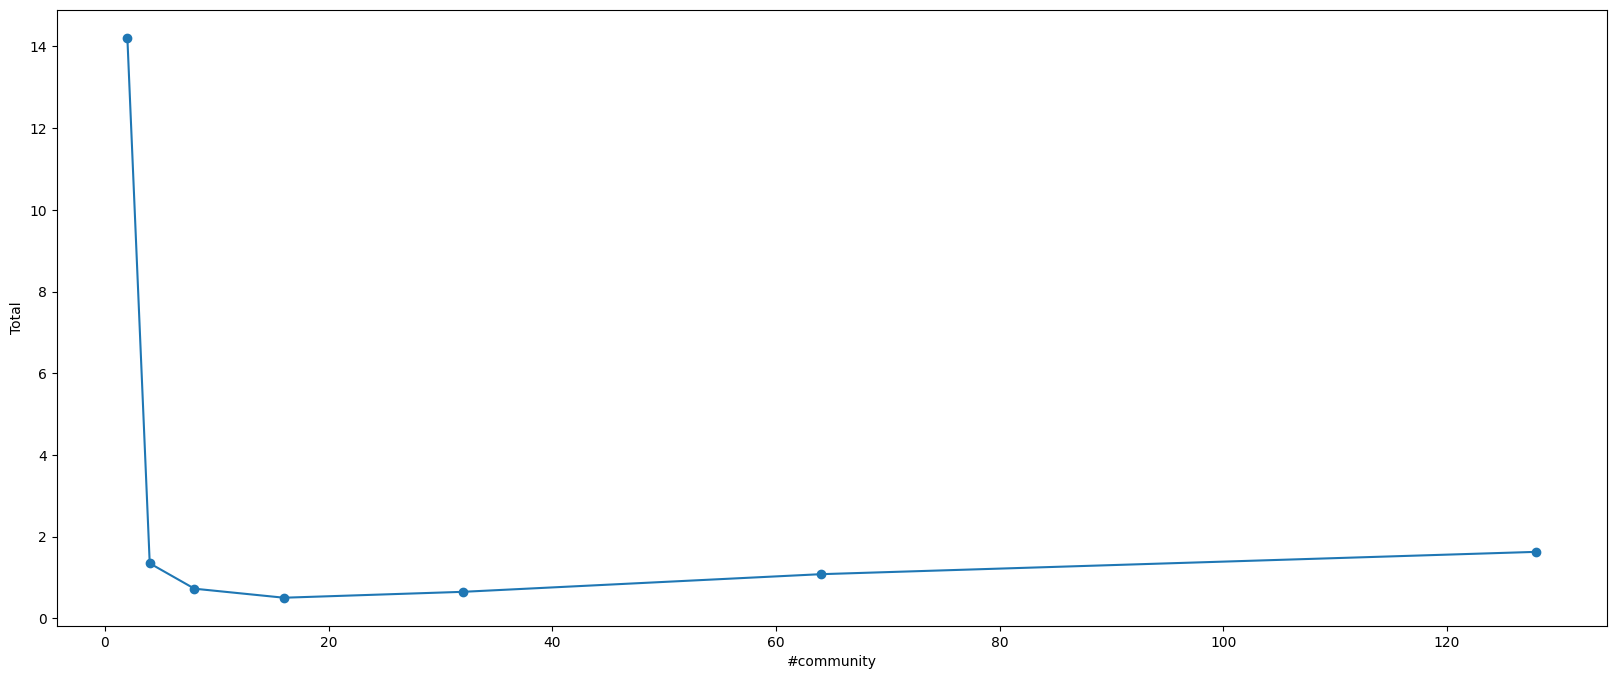

In [101]:
plot_column(dexpcommunityundirected, ["Total"])

##### Show nodesComputation

In [102]:
dexpcommunityundirected[["deltaNodesComputation"]]

,deltaNodesComputation
#community,
2,14.181469
4,1.327609
8,0.688742
16,0.444646
32,0.549577
64,0.928364
128,1.340588


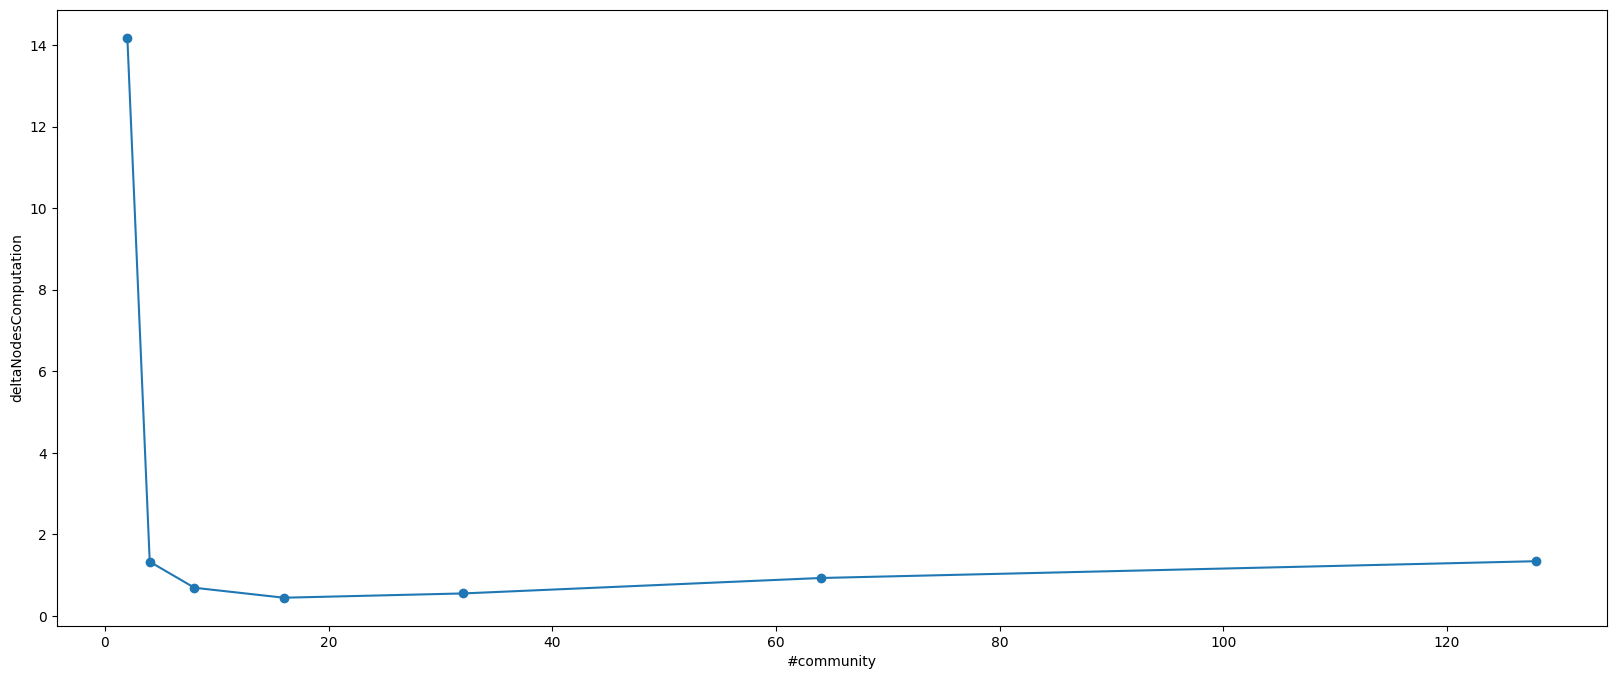

In [103]:
plot_column(dexpcommunityundirected, ["deltaNodesComputation"])

##### Show deltaGLR

In [104]:
dexpcommunityundirected[["deltaGLR"]]

,deltaGLR
#community,
2,0.004374
4,0.004242
8,0.007097
16,0.014598
32,0.028869
64,0.059167
128,0.117562


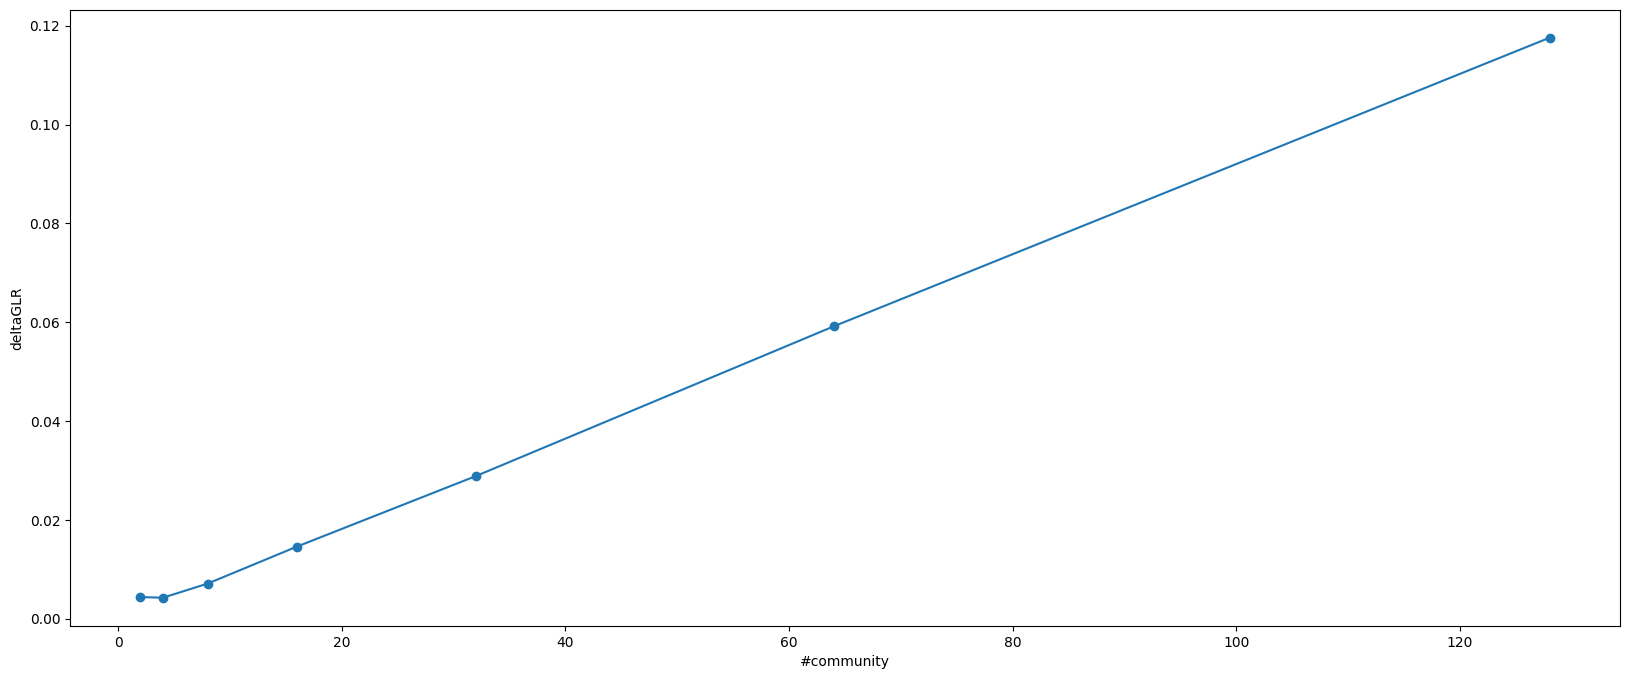

In [105]:
plot_column(dexpcommunityundirected, ["deltaGLR"])

# Statistics (EXP7)

In [106]:
statistics[ statistics["Flag"] == "2expedgeundirected"]

Code                            Graph                Flag Partition  \
                                                                            
1      C++   2expedge(n=640, m=10224).graph  2expedgeundirected       NaN   
3      C++    2expedge(n=640, m=1278).graph  2expedgeundirected       NaN   
5      C++  2expedge(n=640, m=163584).graph  2expedgeundirected       NaN   
7      C++   2expedge(n=640, m=20448).graph  2expedgeundirected       NaN   
9      C++    2expedge(n=640, m=2556).graph  2expedgeundirected       NaN   
11     C++   2expedge(n=640, m=40896).graph  2expedgeundirected       NaN   
13     C++    2expedge(n=640, m=5112).graph  2expedgeundirected       NaN   
15     C++     2expedge(n=640, m=639).graph  2expedgeundirected       NaN   
17     C++   2expedge(n=640, m=81792).graph  2expedgeundirected       NaN   
54  python   2expedge(n=640, m=10224).graph  2expedgeundirected       NaN   
56  python    2expedge(n=640, m=1278).graph  2expedgeundirected       NaN   
58  python  2expedge(n=640, m=163584).graph  2expedgeundirected       NaN   
60  python   2expedge(n=640, m=20448).graph  2expedgeundirected       NaN   
62  python    2expedge(n=640, m=2556).graph  2expedgeundirected       NaN   
64  python   2expedge(n=640, m=40896).graph  2expedgeundirected       NaN   
66  python    2expedge(n=640, m=5112).graph  2expedgeundirected       NaN   
68  python     2expedge(n=640, m=639).graph  2expedgeundirected       NaN   
70  python   2expedge(n=640, m=81792).graph  2expedgeundirected       NaN   

      n       m Community computation                                ...  \
                                count      mean       std       min  ...   
1   640   10224                  10.0  0.018455  0.013910  0.004658  ...   
3   640    1278                  10.0  0.016543  0.013740  0.003477  ...   
5   640  163584                  10.0  0.026696  0.011081  0.015259  ...   
7   640   20448                  10.0  0.020879  0.015683  0.005611  ...   
9   640    2556                  10.0  0.017139  0.017015  0.003822  ...   
11  640   40896                  10.0  0.026110  0.016571  0.007271  ...   
13  640    5112                  10.0  0.017635  0.022812  0.003811  ...   
15  640     639                  10.0  0.016896  0.017658  0.002787  ...   
17  640   81792                  10.0  0.045643  0.027325  0.011841  ...   
54  640   10224                  10.0  0.029182  0.028556  0.007204  ...   
56  640    1278                  10.0  0.014798  0.008782  0.006164  ...   
58  640  163584                  10.0  0.056931  0.017765  0.034708  ...   
60  640   20448                  10.0  0.012377  0.002777  0.008113  ...   
62  640    2556                  10.0  0.013340  0.006793  0.006830  ...   
64  640   40896                  10.0  0.017249  0.006490  0.010542  ...   
66  640    5112                  10.0  0.016920  0.016046  0.005543  ...   
68  640     639                  10.0  0.027629  0.044873  0.005552  ...   
70  640   81792                  10.0  0.033355  0.024283  0.010508  ...   

   deltaNodesComputation           deltaGLR                                \
                     75%       max    count      mean       std       min   
1               0.004860  0.009673     10.0  0.000305  0.000046  0.000239   
3               0.003314  0.011671     10.0  0.000294  0.000061  0.000212   
5               0.025893  0.038172     10.0  0.001452  0.000346  0.001188   
7               0.013242  0.058160     10.0  0.000416  0.000454  0.000175   
9               0.003030  0.003447     10.0  0.000263  0.000056  0.000199   
11              0.027011  0.047857     10.0  0.000658  0.000176  0.000397   
13              0.004773  0.054650     10.0  0.000268  0.000175  0.000126   
15              0.004210  0.029239     10.0  0.000335  0.000044  0.000283   
17              0.027655  0.031115     10.0  0.001190  0.000249  0.000937   
54              0.031379  0.084623     10.0  0.001659  0.000673  0.000449   
56              0.01

# Double Experiment (EXP7)

##### Filter results

In [107]:
dexpedgeundirected = all_data[ all_data["Flag"] == "2expedgeundirected"]
dexpedgeundirected = dexpedgeundirected[dexpedgeundirected["Code"] == programming_language]

##### Set number of edges as ID

In [108]:
dexpedgeundirected.set_index("m", inplace=True)
dexpedgeundirected.sort_index(inplace=True)

##### Show total time

In [109]:
dexpedgeundirected[["Total"]]

,Total
m,
639,0.022667
1278,0.020512
2556,0.020234
5112,0.027413
10224,0.023793
20448,0.036056
40896,0.046401
81792,0.068138
163584,0.052599


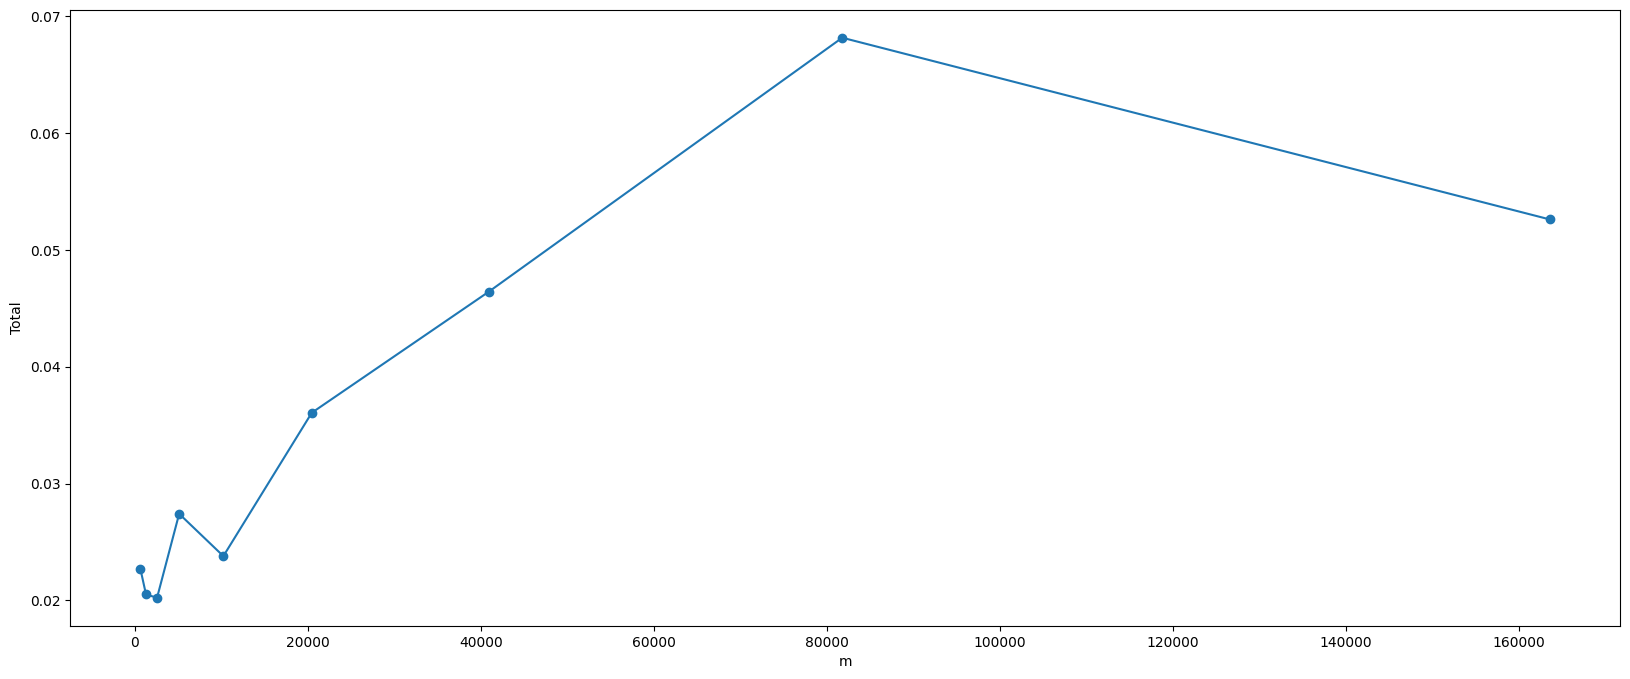

In [110]:
plot_column(dexpedgeundirected, ["Total"])

##### Show partitionsComputation

In [111]:
dexpedgeundirected[["Community computation"]]

,Community computation
m,
639,0.016896
1278,0.016543
2556,0.017139
5112,0.017635
10224,0.018455
20448,0.020879
40896,0.026110
81792,0.045643
163584,0.026696


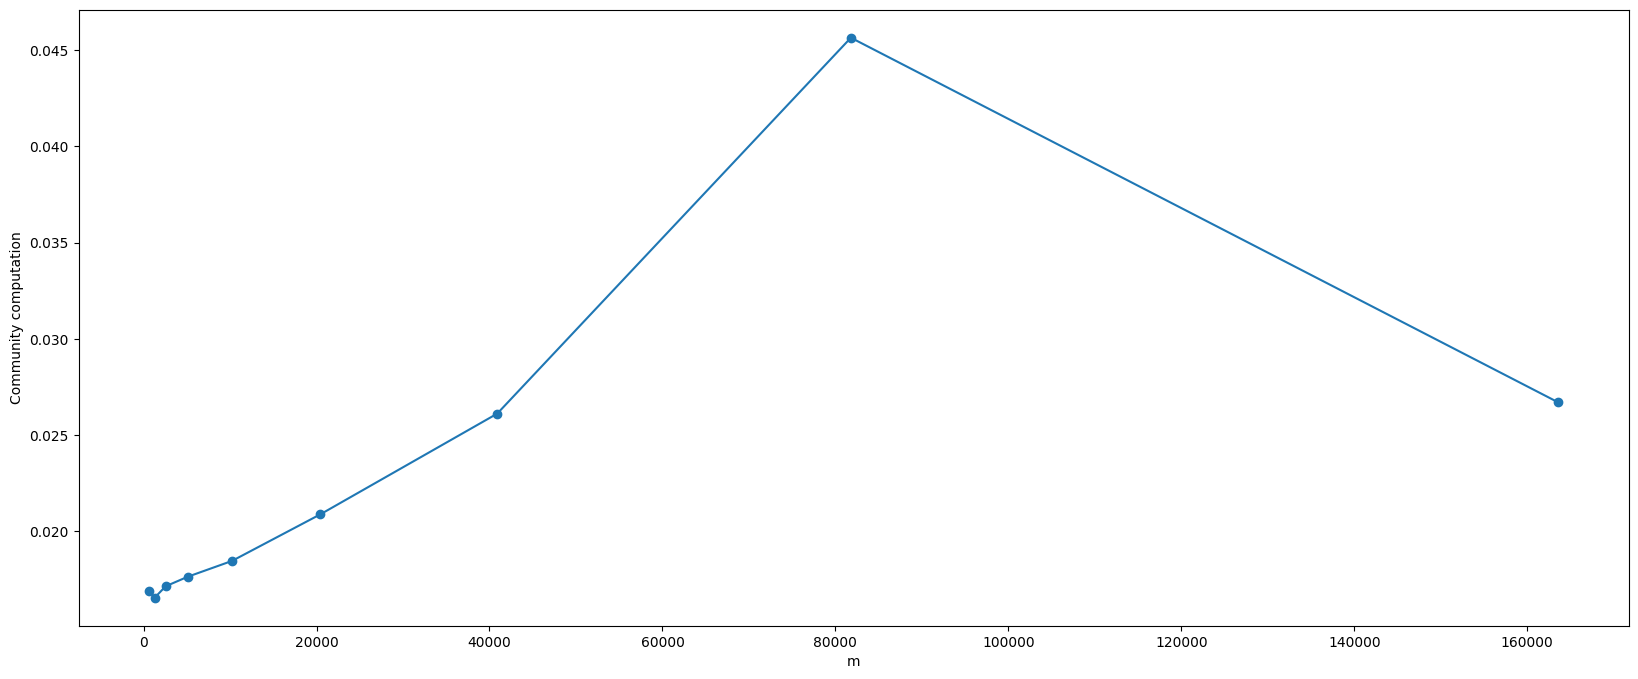

In [112]:
plot_column(dexpedgeundirected, ["Community computation"])

##### Show nodesComputation

In [113]:
dexpedgeundirected[["deltaNodesComputation"]]

,deltaNodesComputation
m,
639,0.005407
1278,0.003650
2556,0.002813
5112,0.009494
10224,0.005016
20448,0.014748
40896,0.019618
81792,0.021287
163584,0.024435


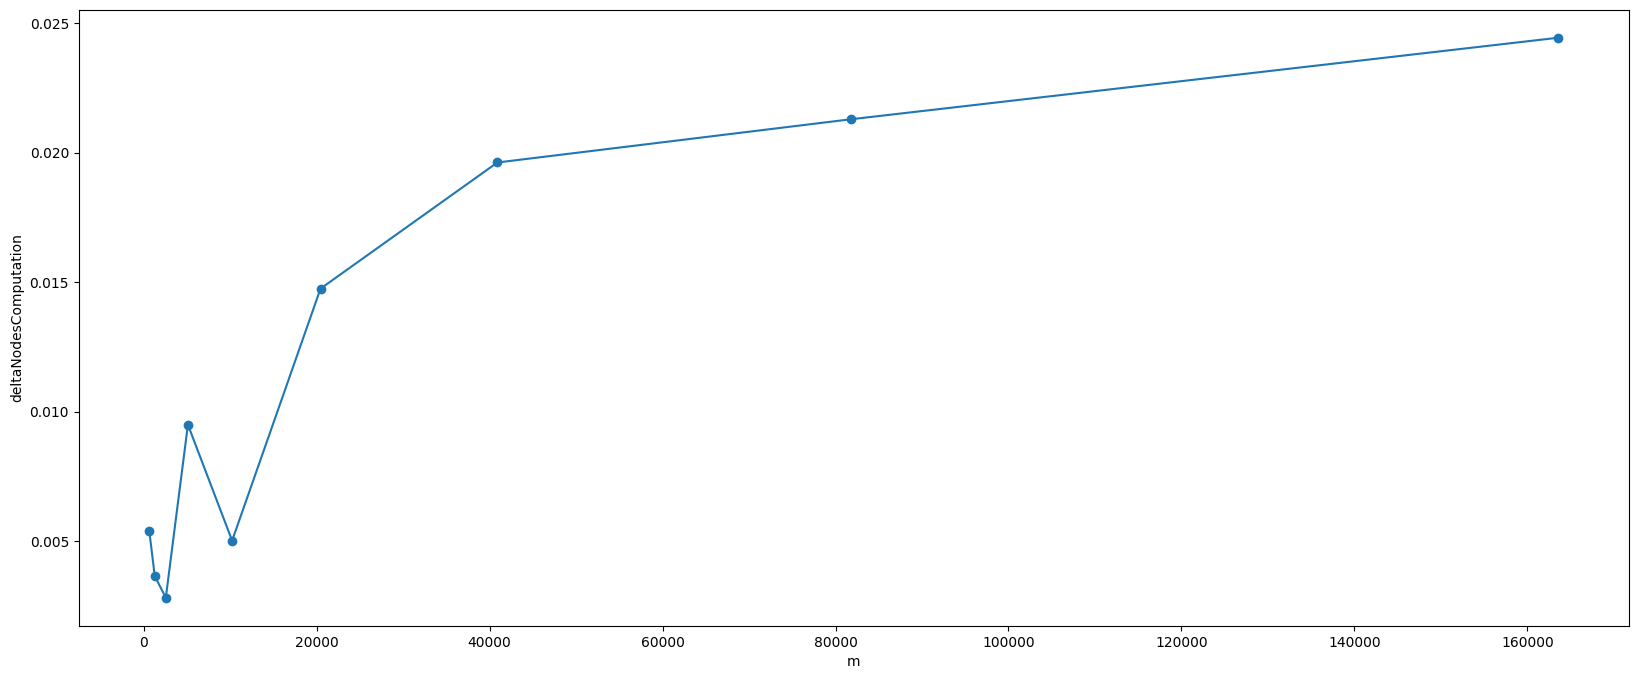

In [114]:
plot_column(dexpedgeundirected, ["deltaNodesComputation"])

##### Show deltaGLR

In [115]:
dexpedgeundirected[["deltaGLR"]]

,deltaGLR
m,
639,0.000335
1278,0.000294
2556,0.000263
5112,0.000268
10224,0.000305
20448,0.000416
40896,0.000658
81792,0.001190
163584,0.001452


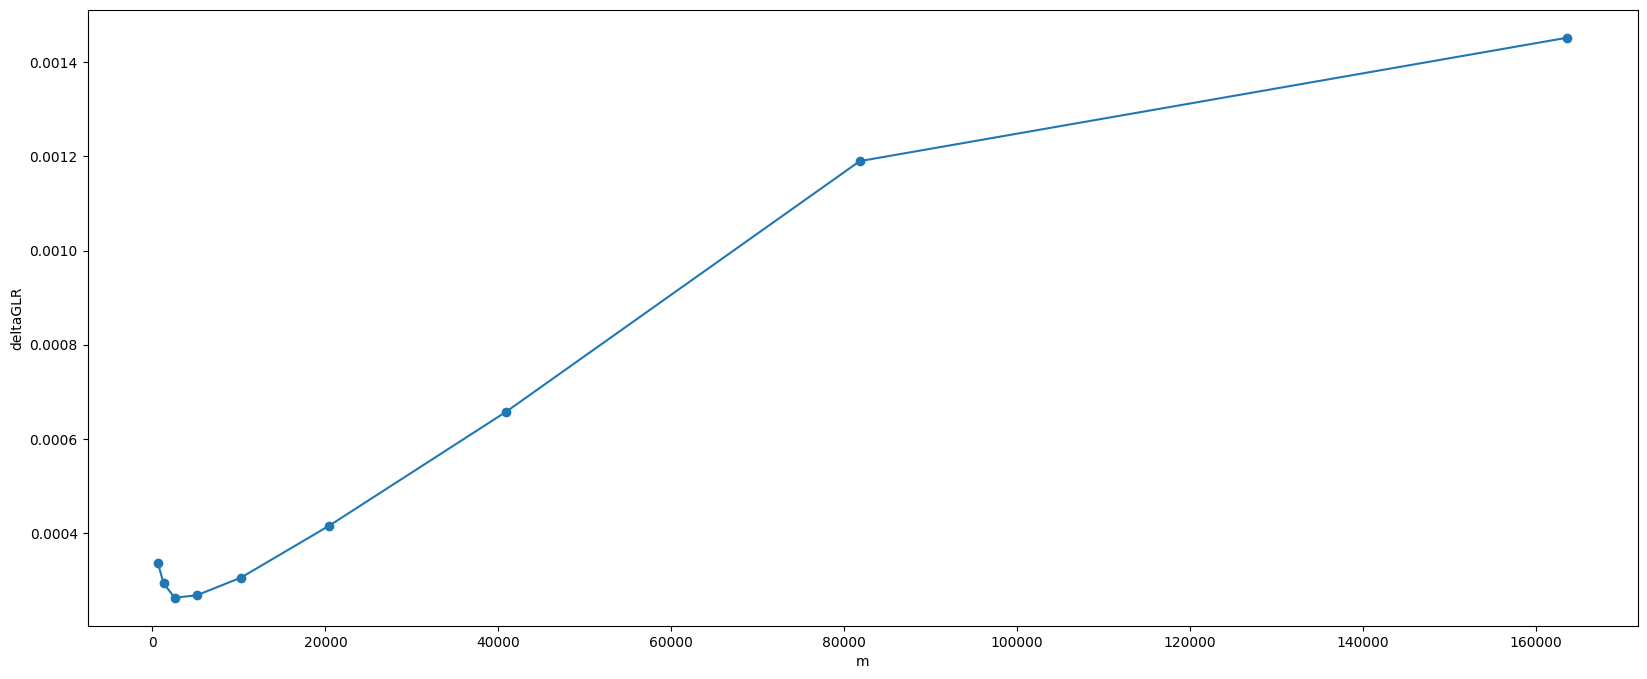

In [116]:
plot_column(dexpedgeundirected, ["deltaGLR"])